In [1]:
import pandas as pd

life_expectancy_df =  pd.read_csv(r'C:\Users\LENOVO\Desktop\Machine learning\Linear Regression\Life expectancy linear regression\Life Expectancy Data.csv')
print(life_expectancy_df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

In [2]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Why this is a regression problem?

First you have to analysis the data before using the algorithm. Here the dependant variable(y) is life expectancy column which
are continuous numeric values. This is a mutiple linear regression problem because one y, mutiple x's

In [3]:
# converting my data into dummy data
life_expectancy_df = pd.get_dummies(life_expectancy_df, drop_first=True).astype(float)
print(life_expectancy_df)

        Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           62.0     0.01   
1     2014.0              59.9            271.0           64.0     0.01   
2     2013.0              59.9            268.0           66.0     0.01   
3     2012.0              59.5            272.0           69.0     0.01   
4     2011.0              59.2            275.0           71.0     0.01   
...      ...               ...              ...            ...      ...   
2933  2004.0              44.3            723.0           27.0     4.36   
2934  2003.0              44.5            715.0           26.0     4.06   
2935  2002.0              44.8             73.0           25.0     4.43   
2936  2001.0              45.3            686.0           25.0     1.72   
2937  2000.0              46.0            665.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         

In [68]:
life_expectancy_df.isnull().sum() # checking for null columns

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [69]:
life_expectancy_df[life_expectancy_df.isnull().any(axis=1)] #checking columns with nulls, axis=1 means colums

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [4]:
#filtering numerical columns
numerical = life_expectancy_df.select_dtypes(include=['float64', 'int64'])
numerical.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ',
       ...
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe',
       'Status_Developing'],
      dtype='object', length=213)

In [5]:
# replacing null with mean
for i in numerical.columns:
    mean_val = life_expectancy_df[i].mean()
    life_expectancy_df[i] = life_expectancy_df[i].fillna(mean_val)

life_expectancy_df.isnull().sum()

Year                 0
Life expectancy      0
Adult Mortality      0
infant deaths        0
Alcohol              0
                    ..
Country_Viet Nam     0
Country_Yemen        0
Country_Zambia       0
Country_Zimbabwe     0
Status_Developing    0
Length: 213, dtype: int64

In [6]:
# removing spaces from columns
numerical.columns = numerical.columns.str.strip()

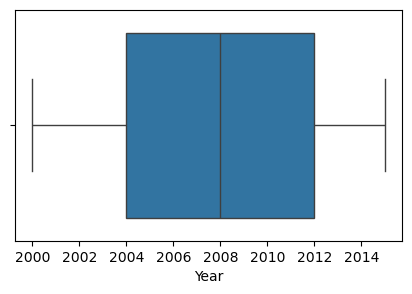

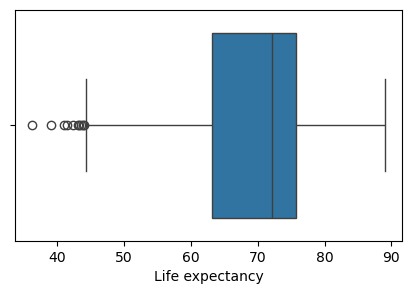

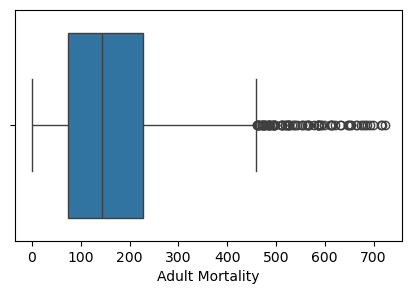

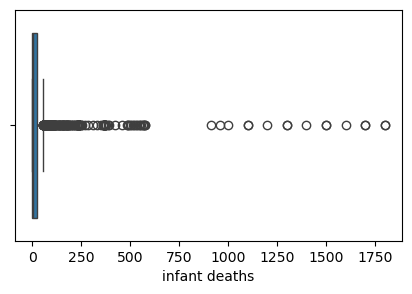

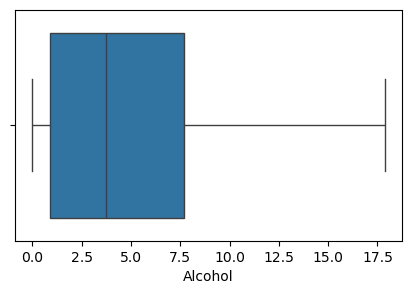

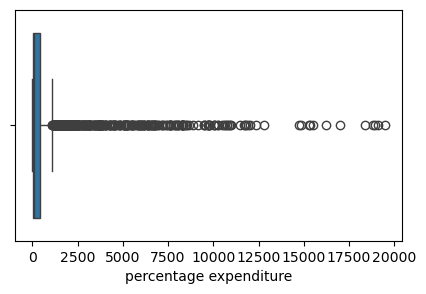

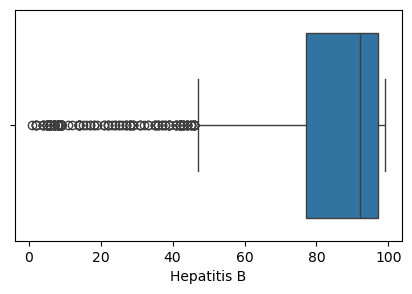

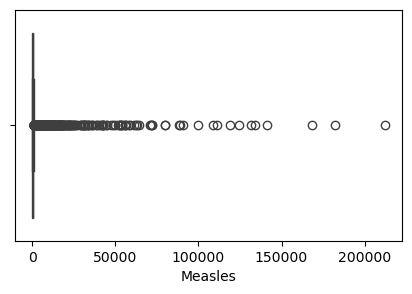

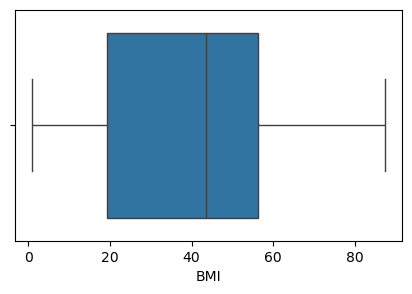

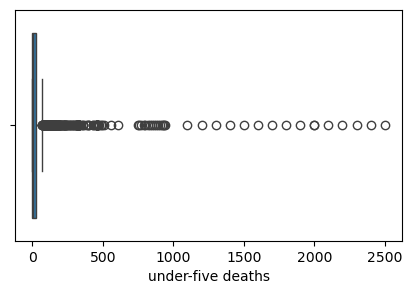

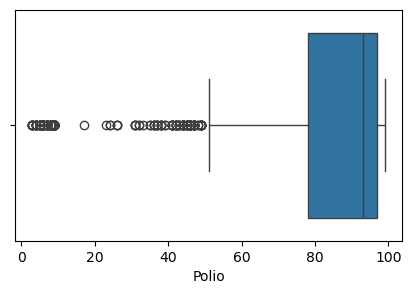

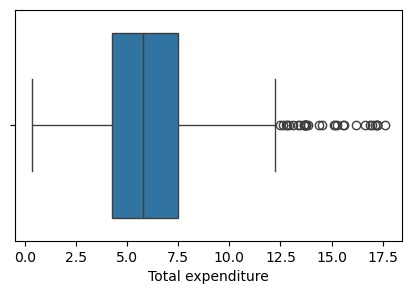

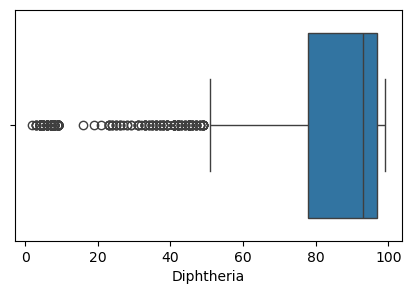

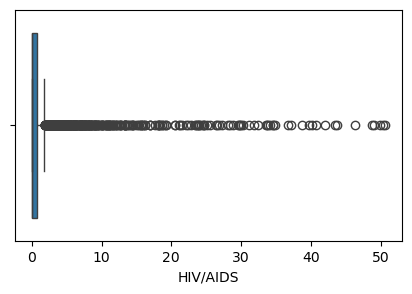

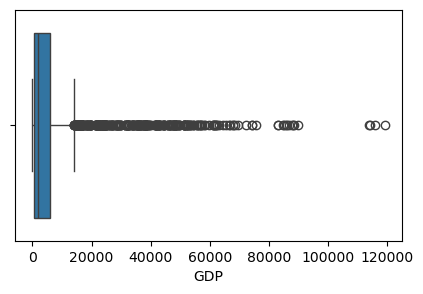

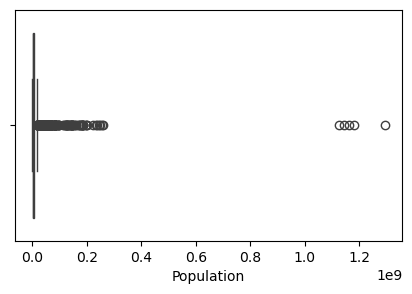

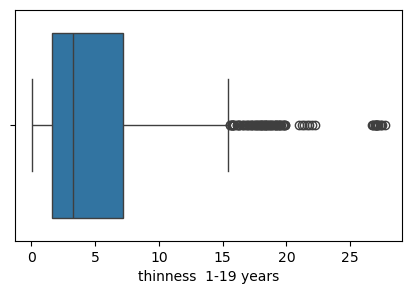

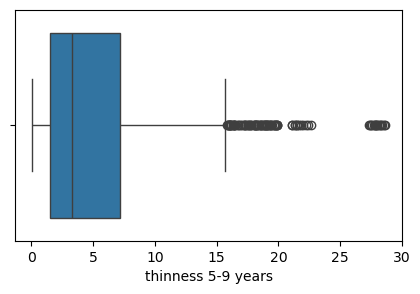

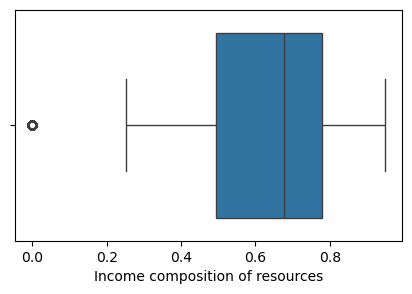

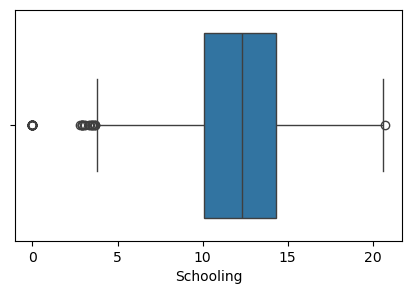

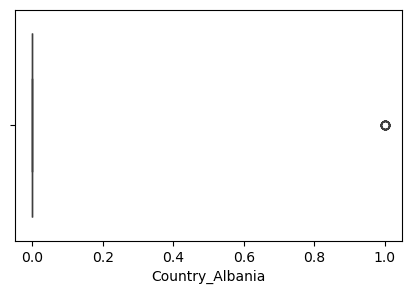

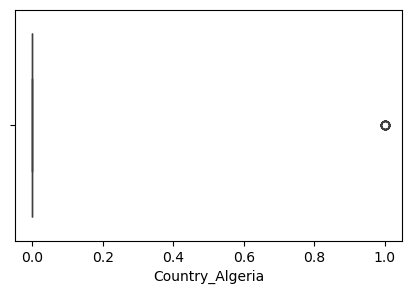

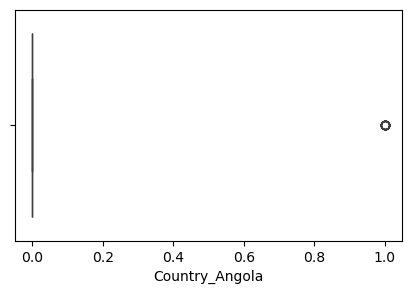

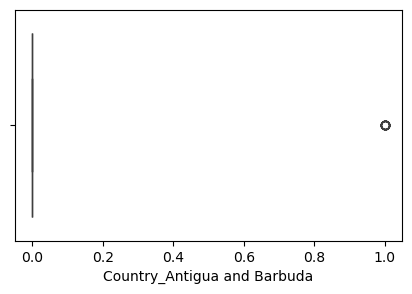

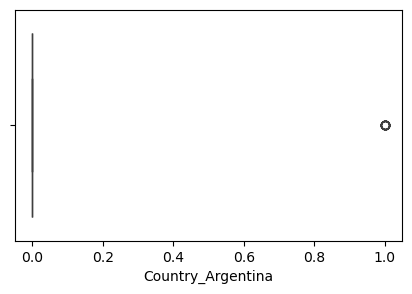

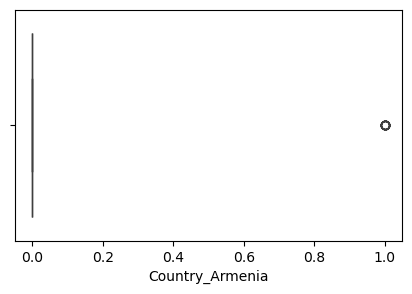

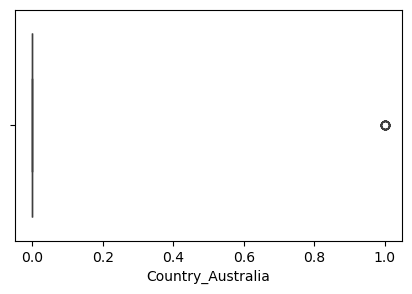

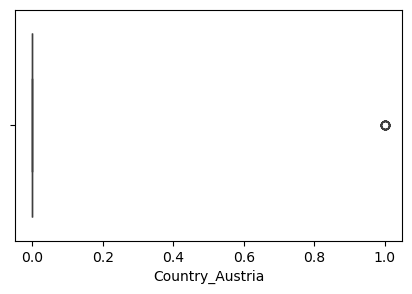

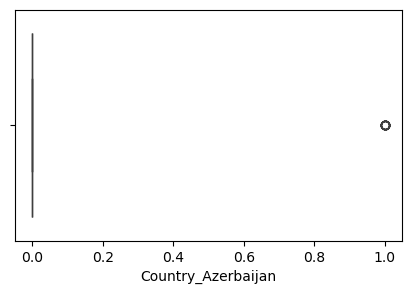

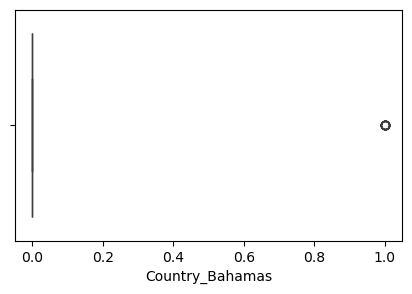

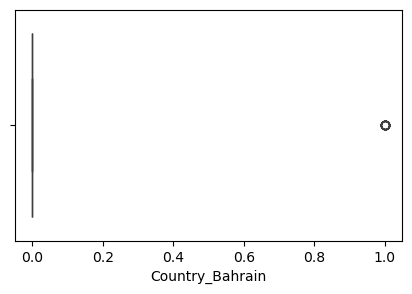

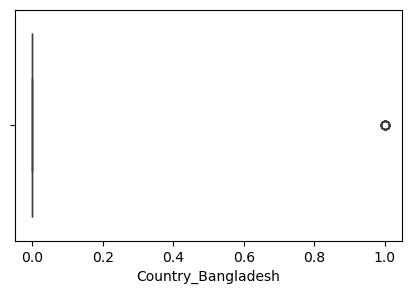

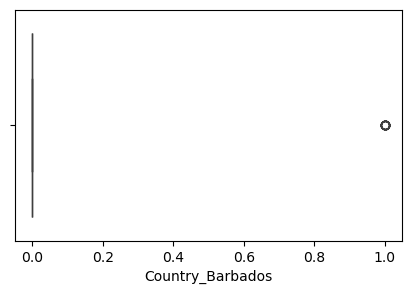

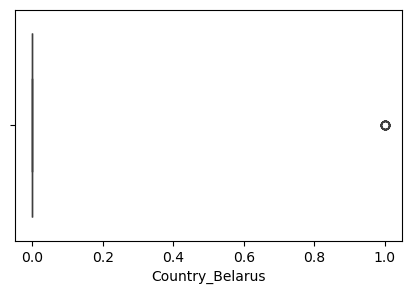

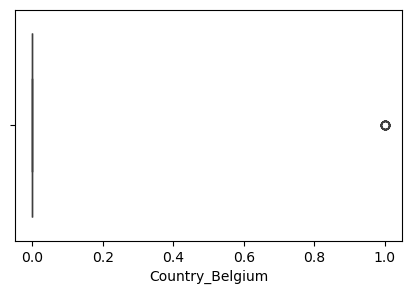

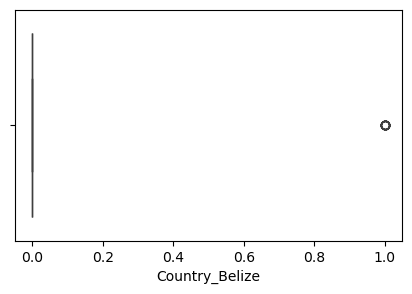

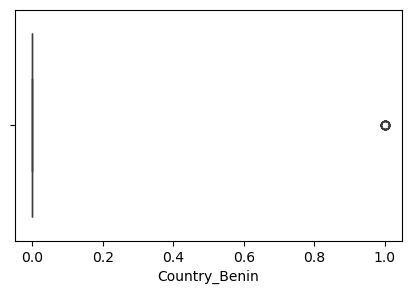

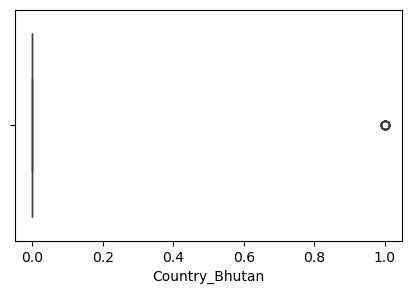

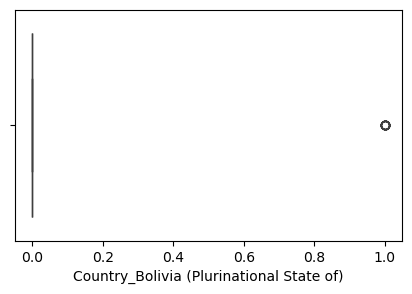

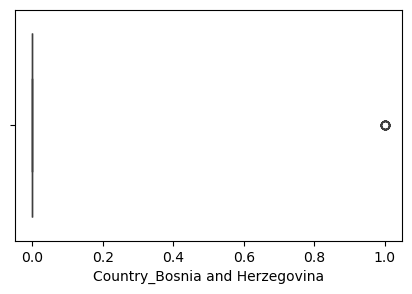

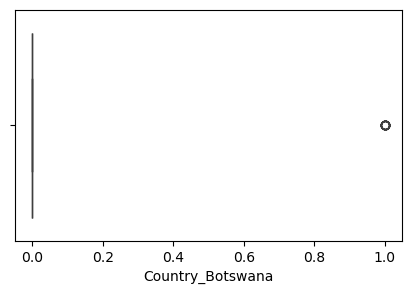

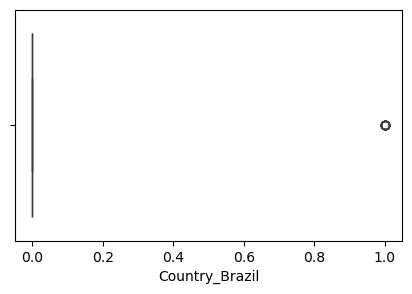

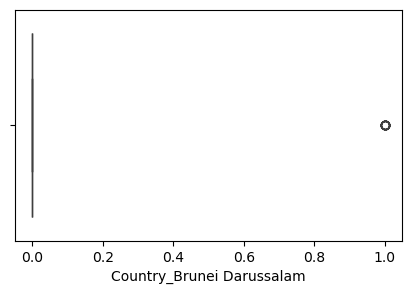

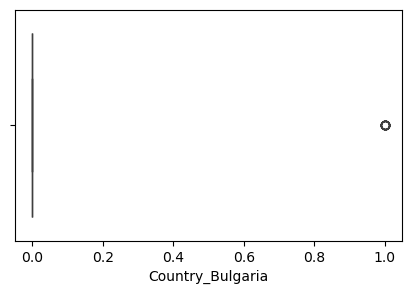

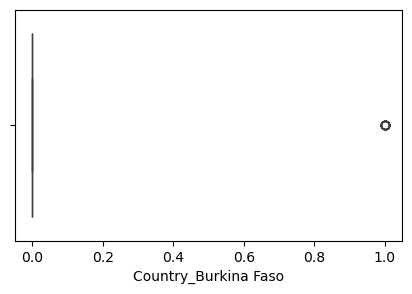

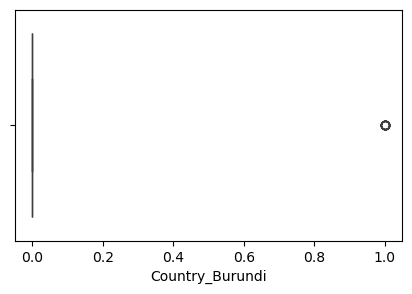

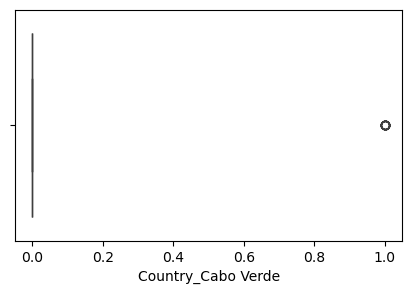

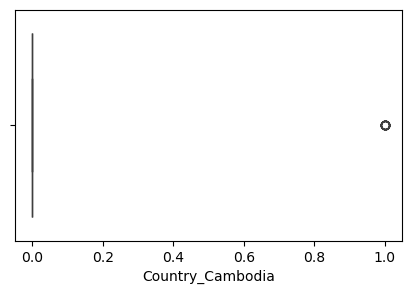

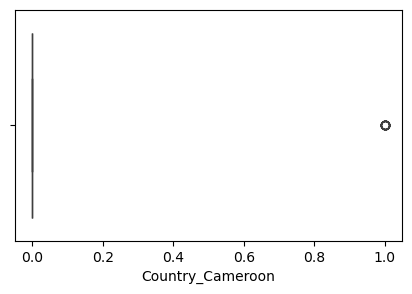

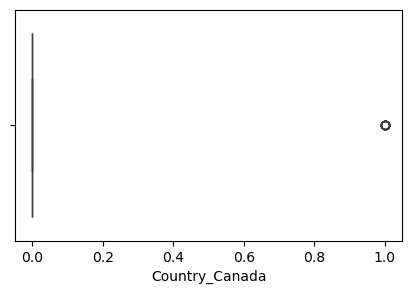

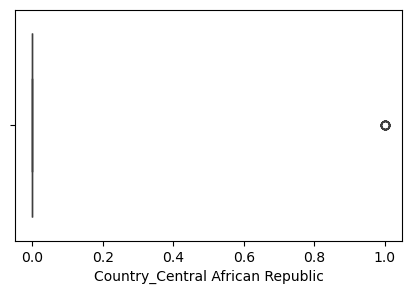

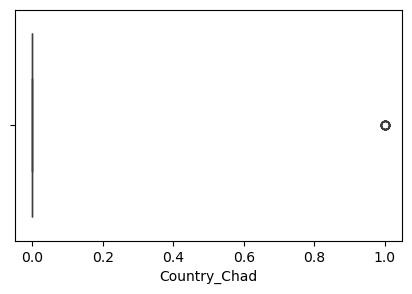

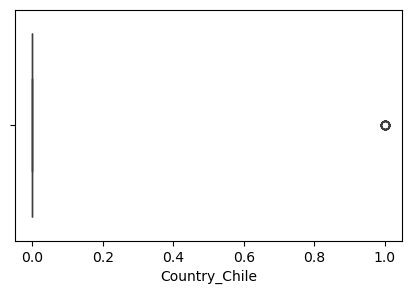

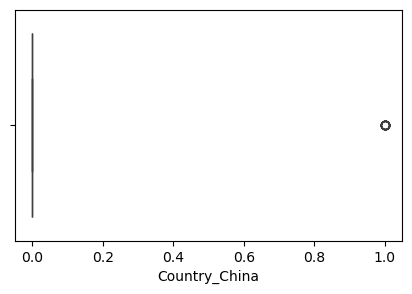

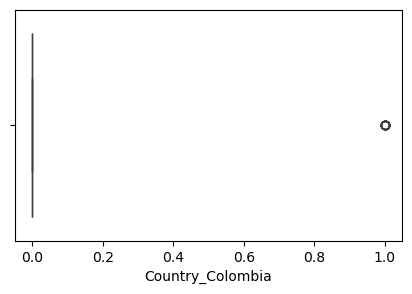

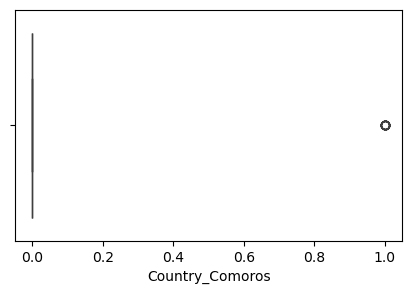

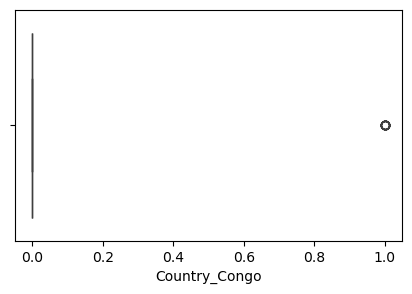

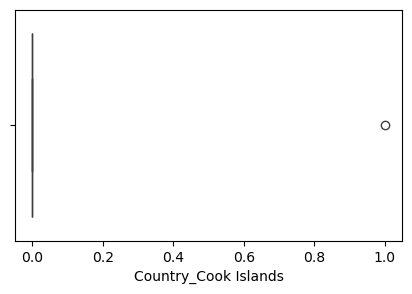

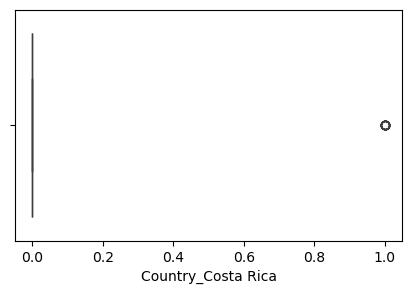

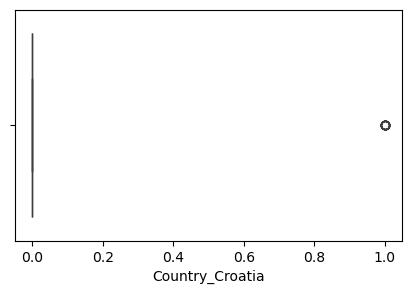

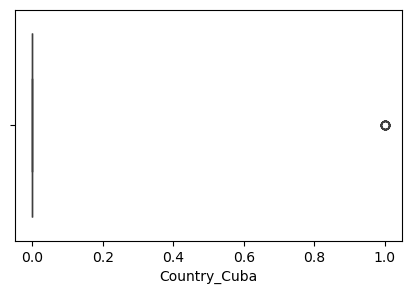

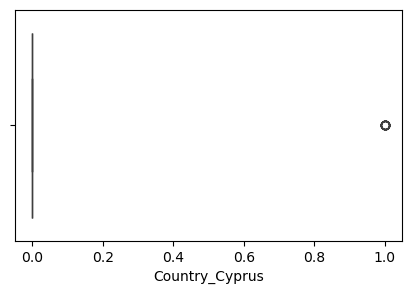

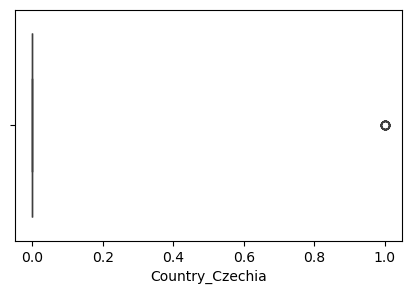

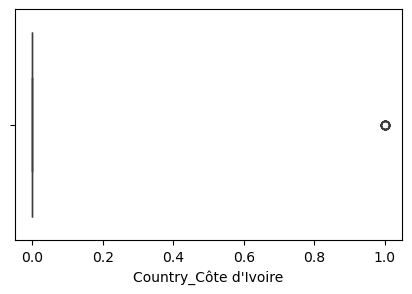

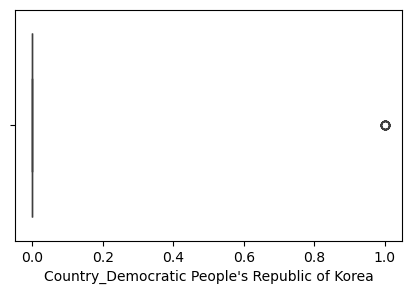

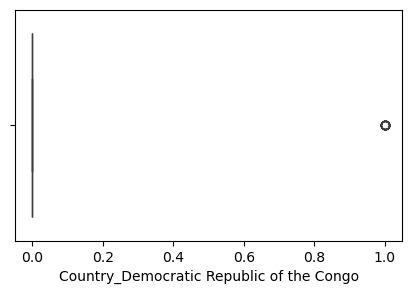

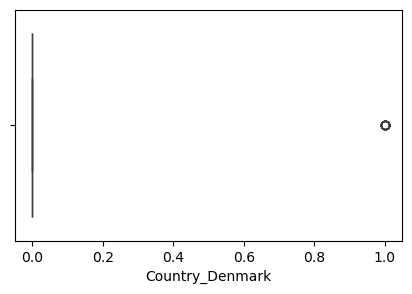

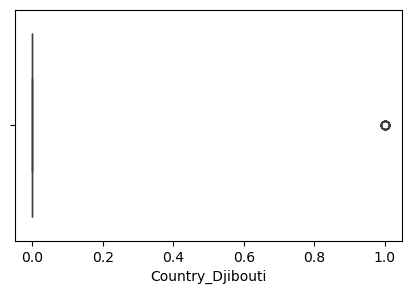

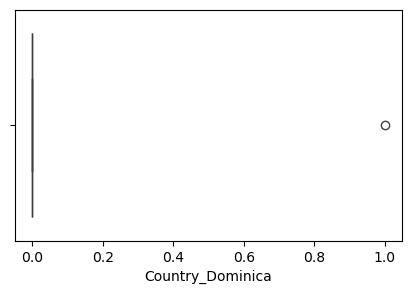

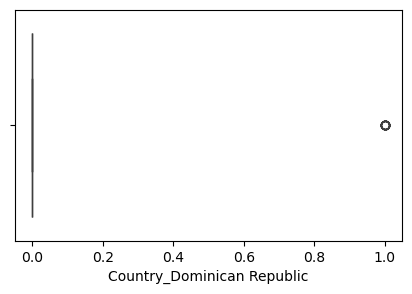

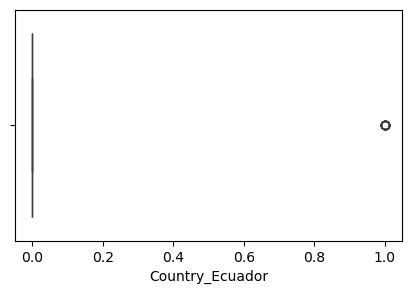

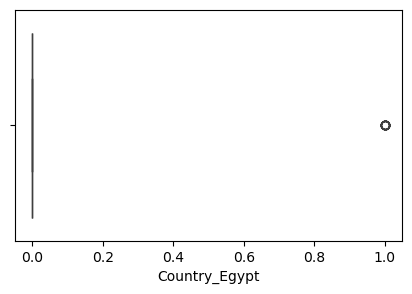

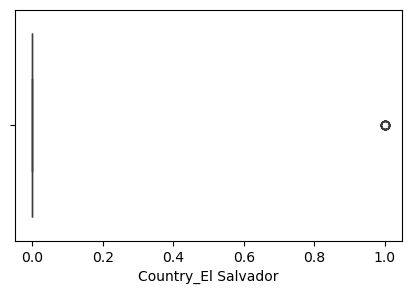

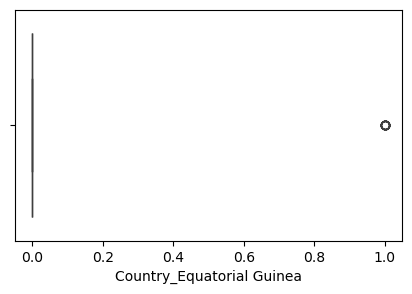

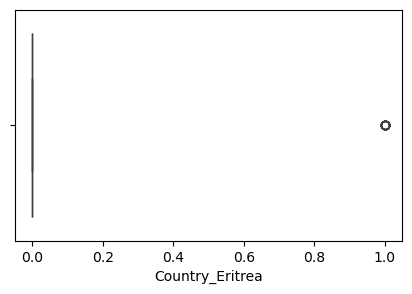

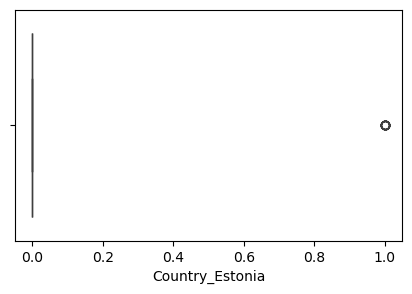

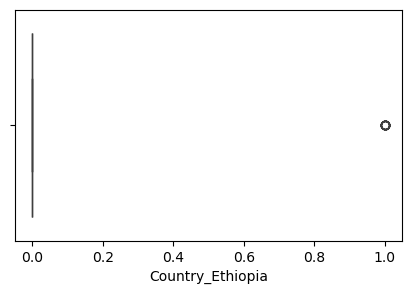

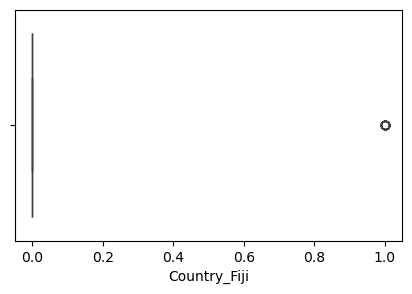

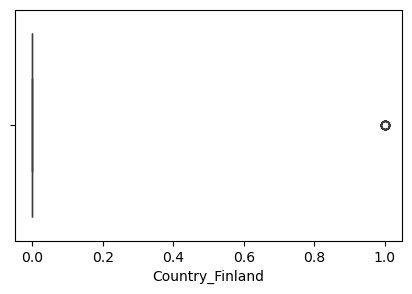

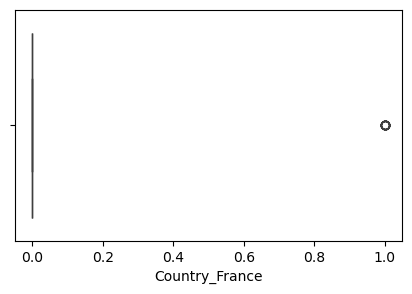

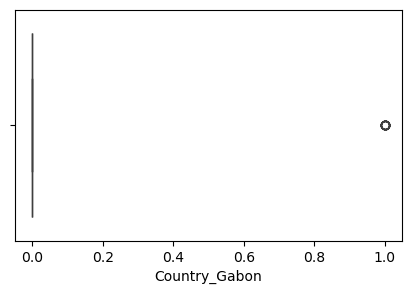

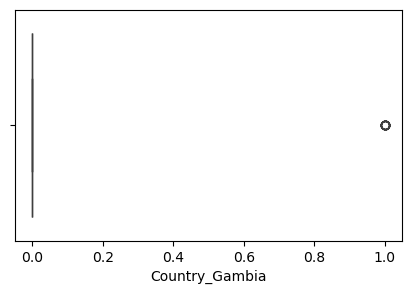

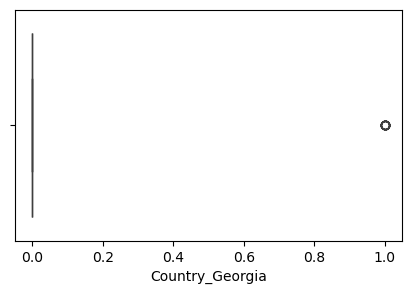

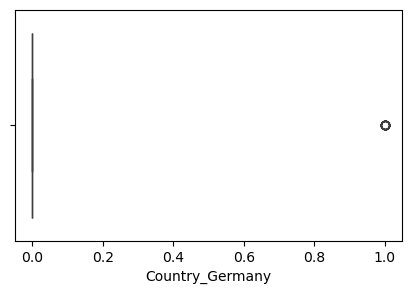

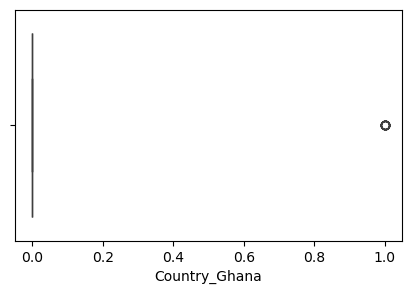

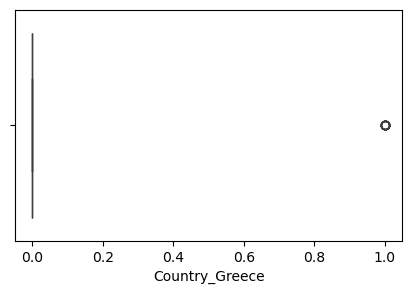

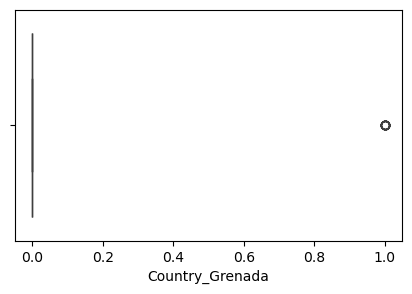

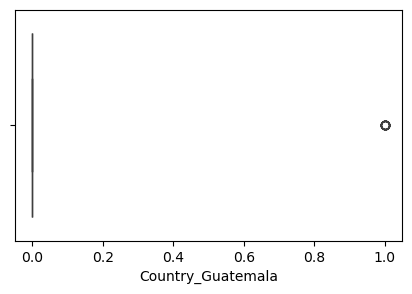

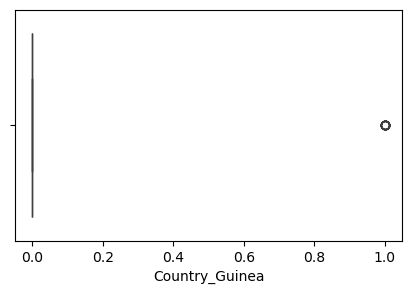

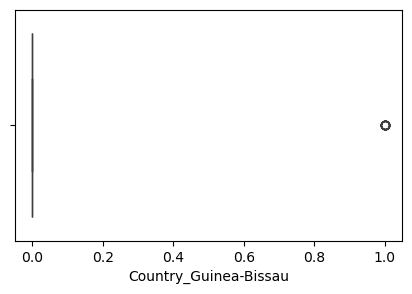

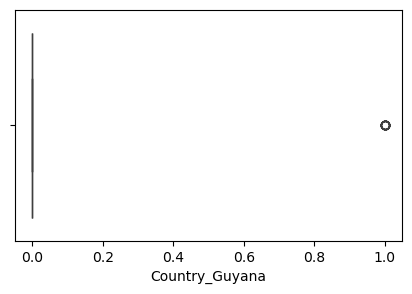

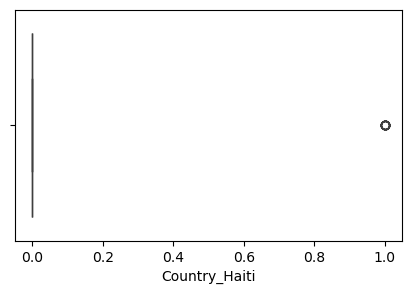

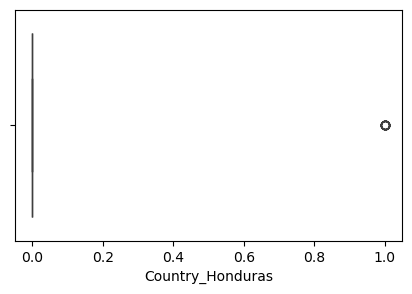

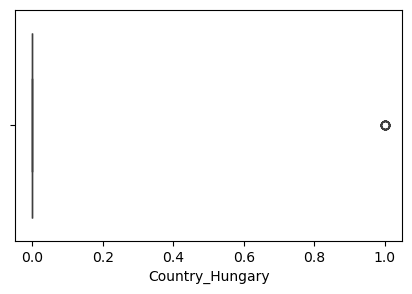

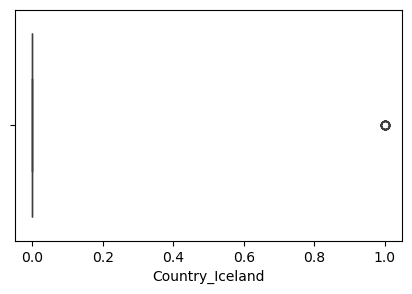

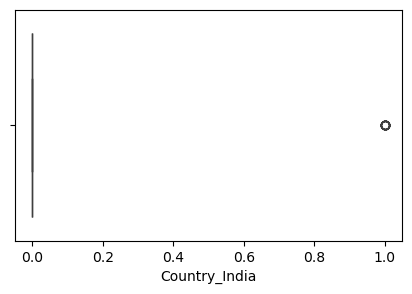

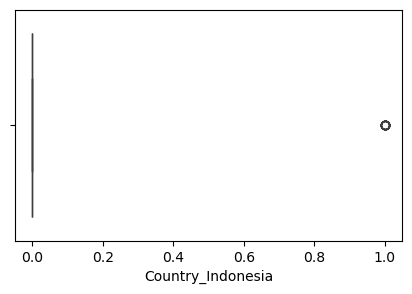

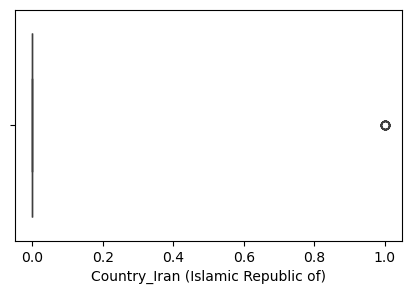

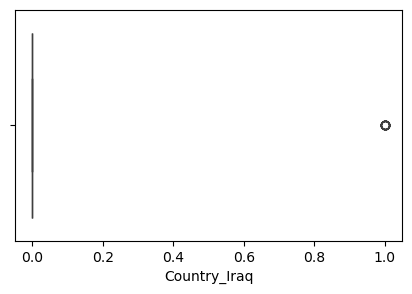

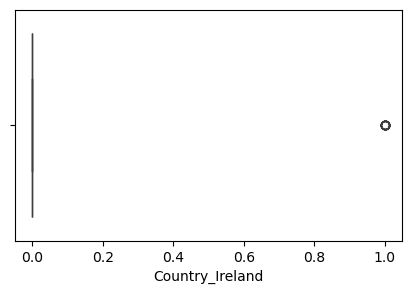

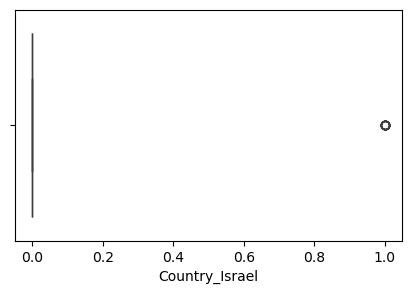

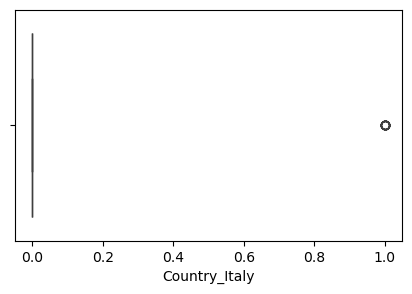

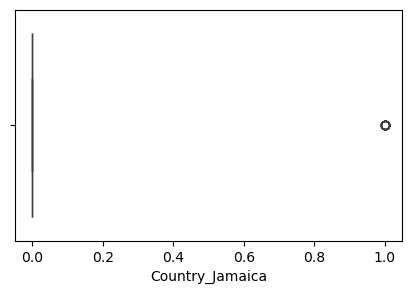

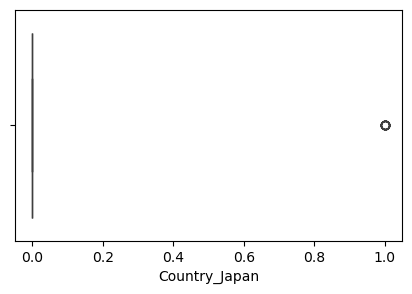

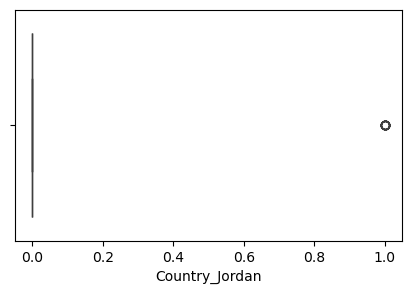

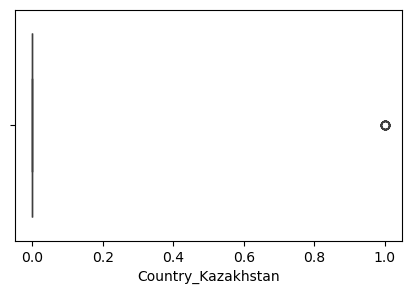

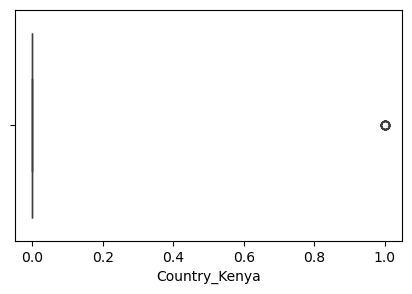

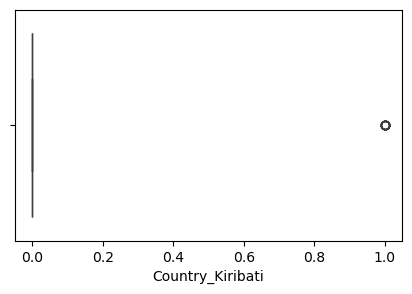

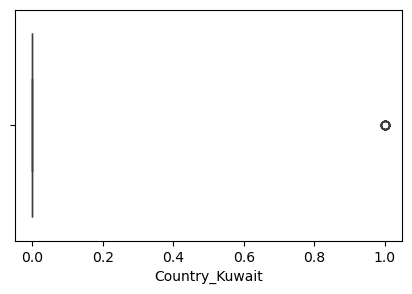

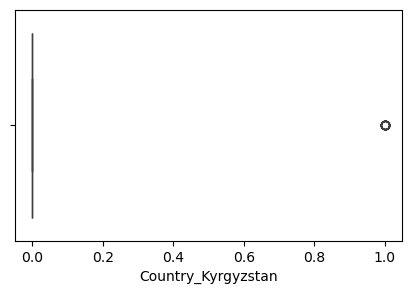

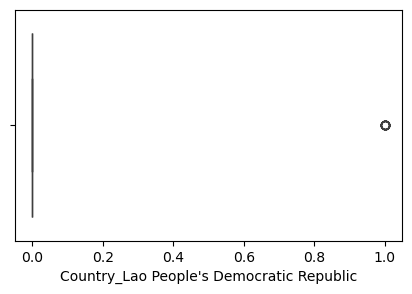

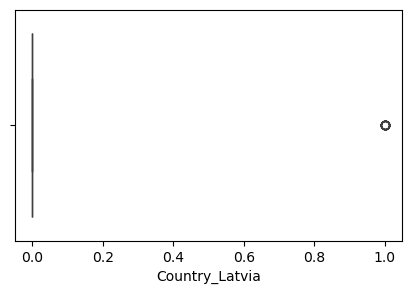

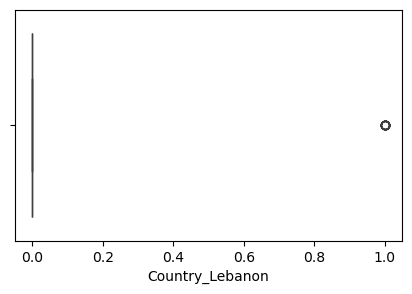

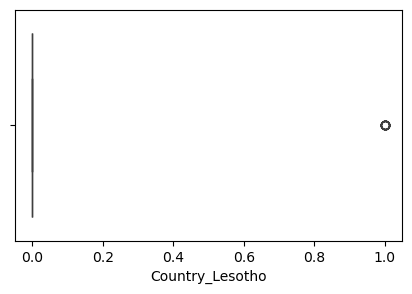

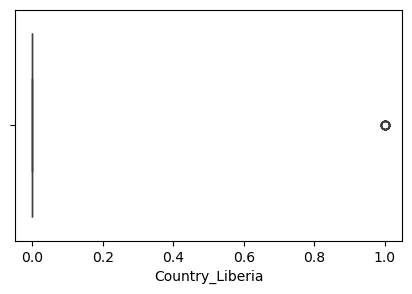

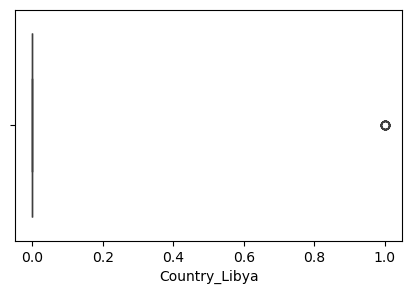

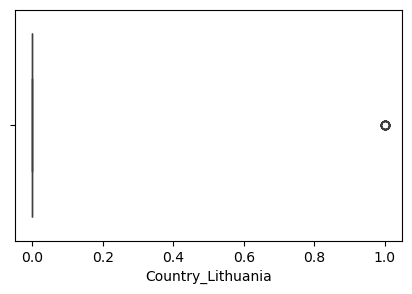

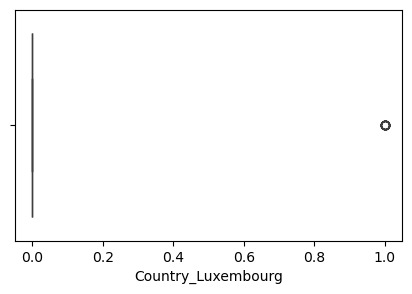

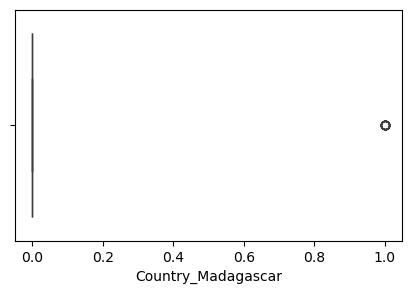

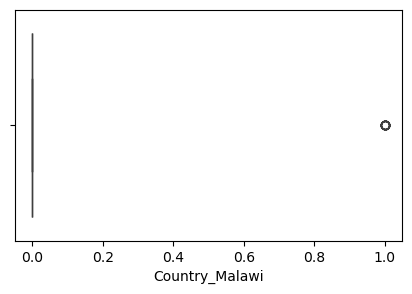

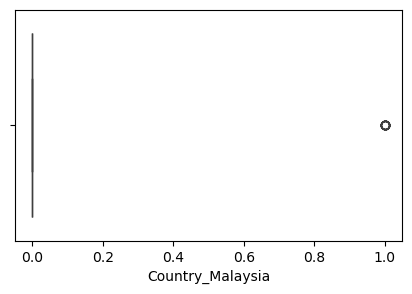

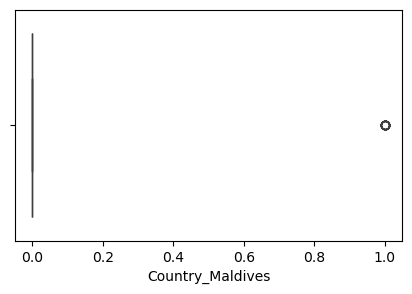

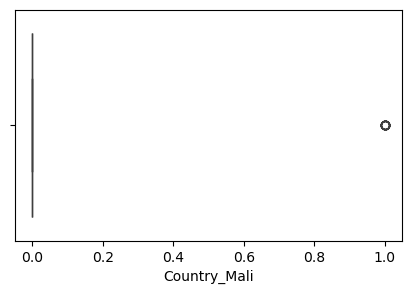

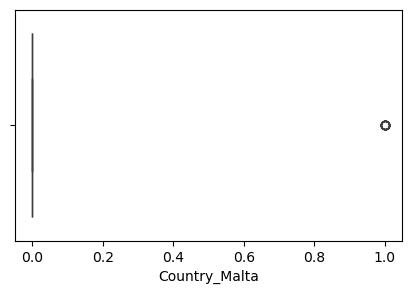

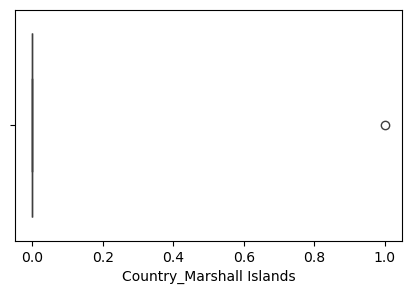

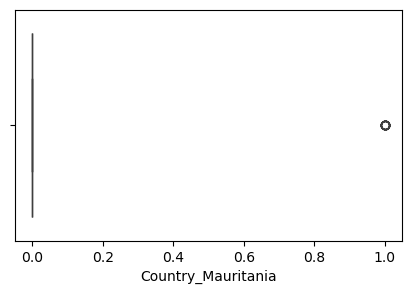

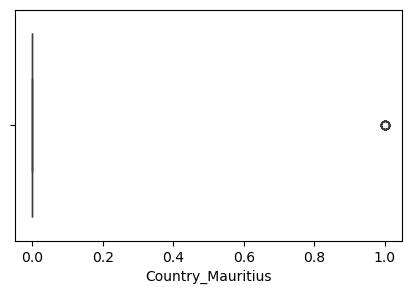

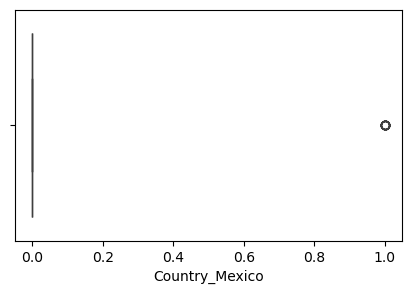

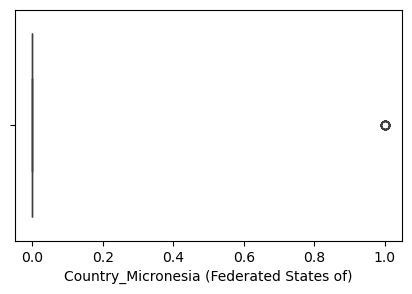

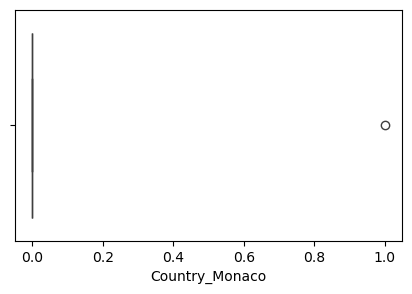

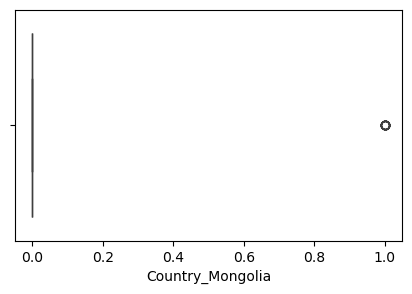

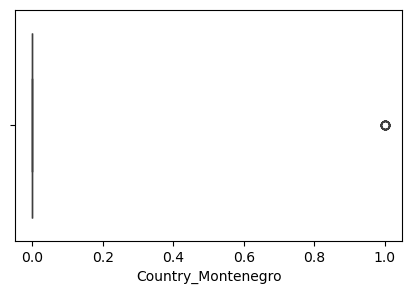

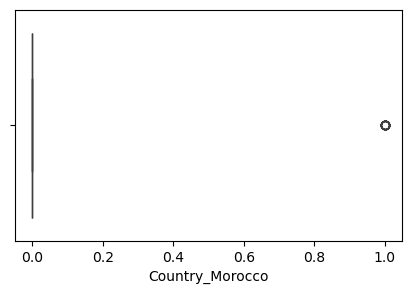

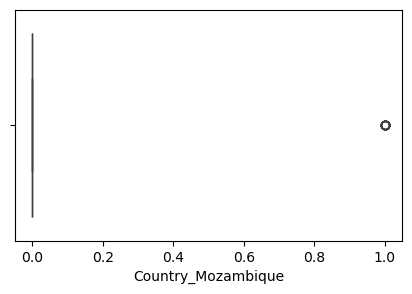

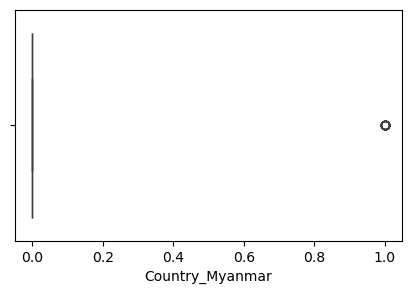

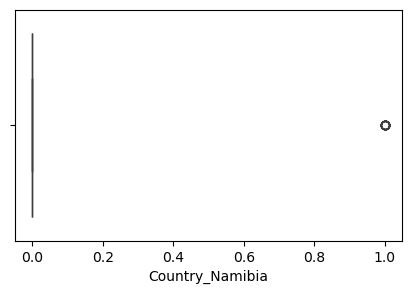

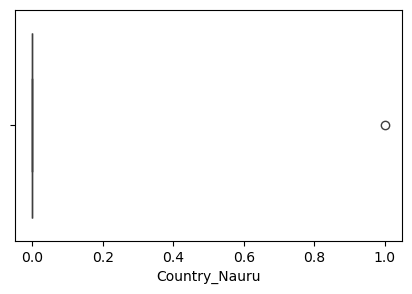

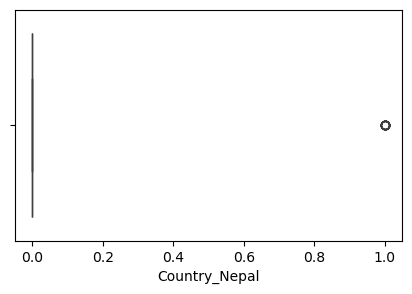

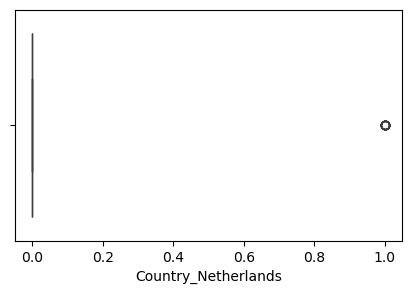

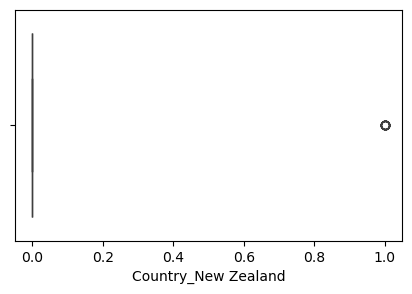

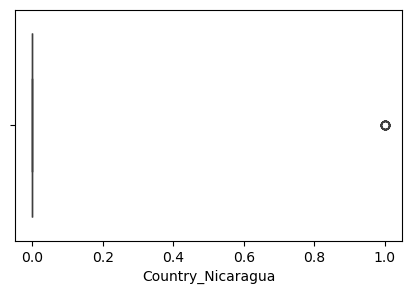

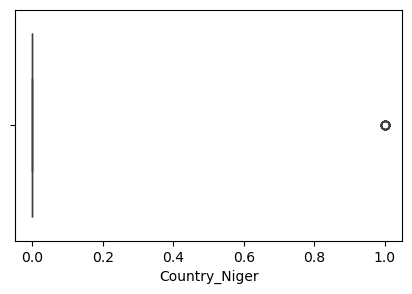

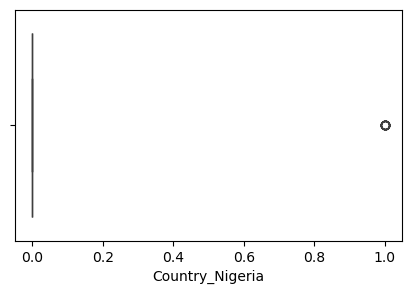

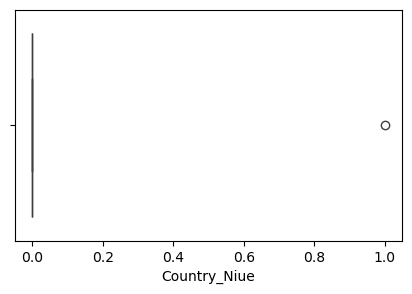

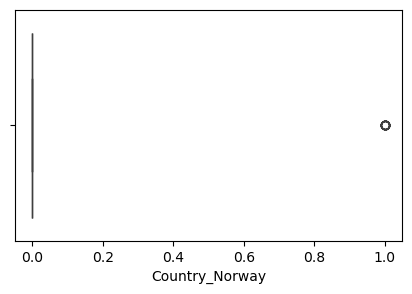

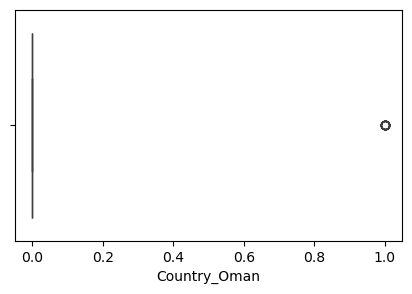

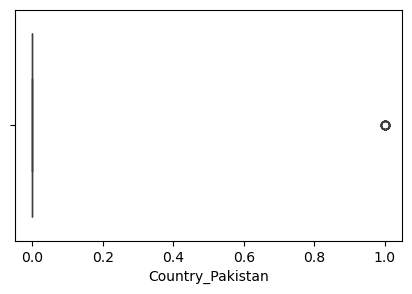

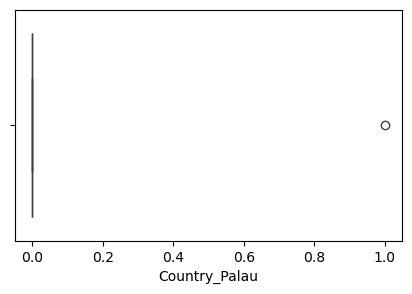

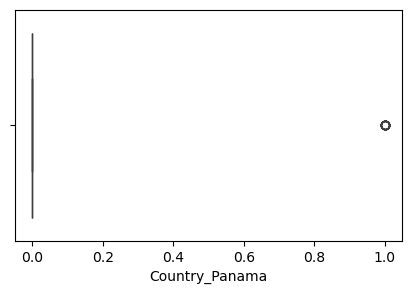

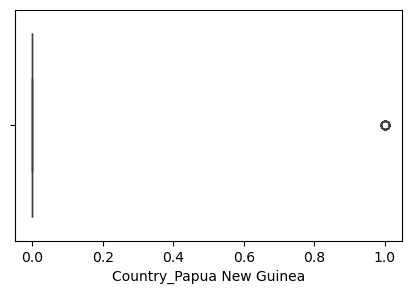

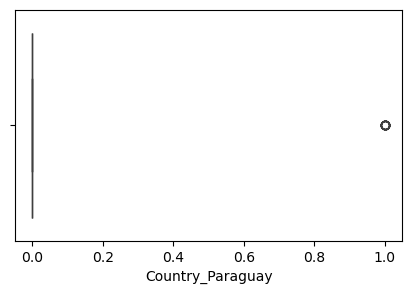

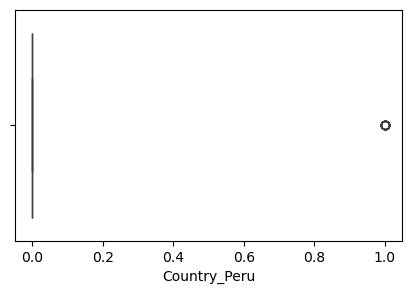

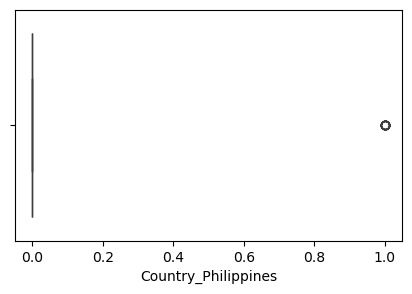

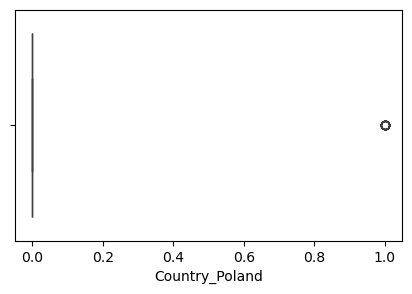

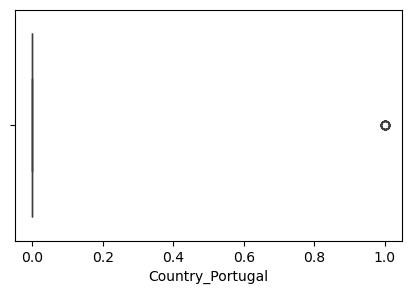

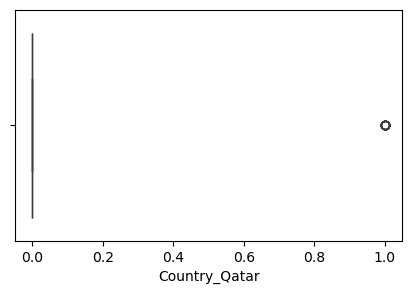

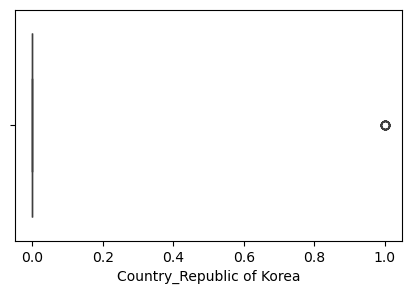

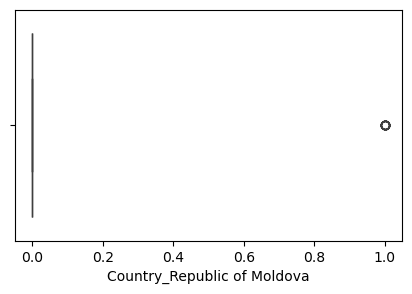

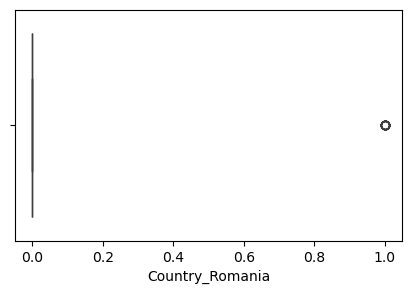

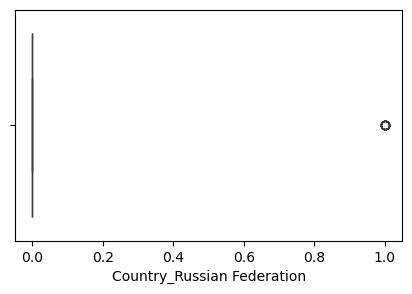

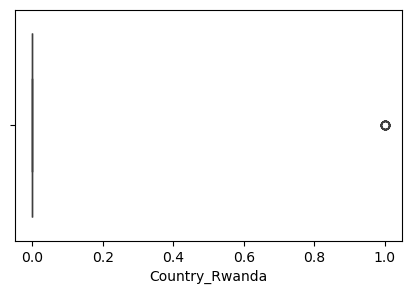

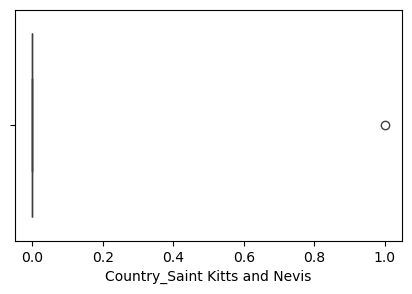

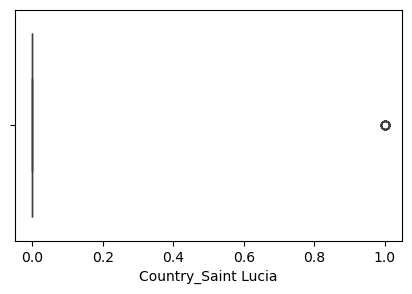

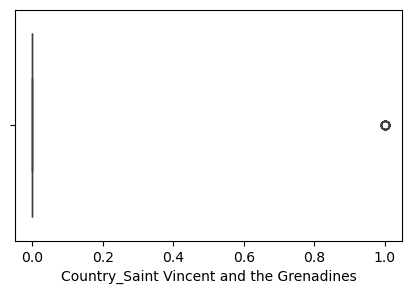

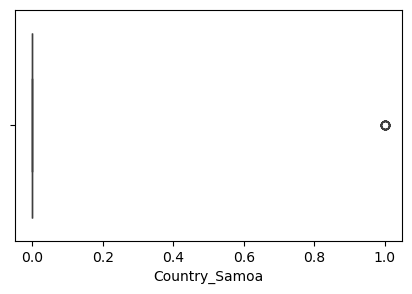

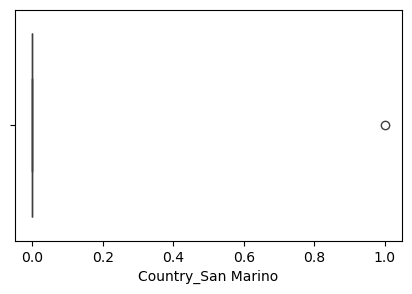

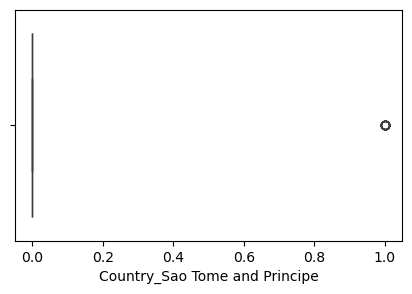

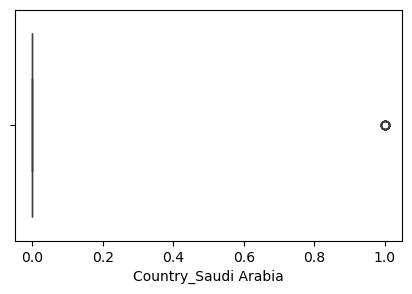

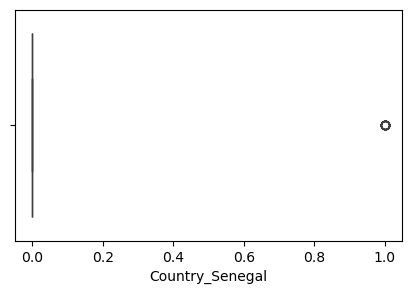

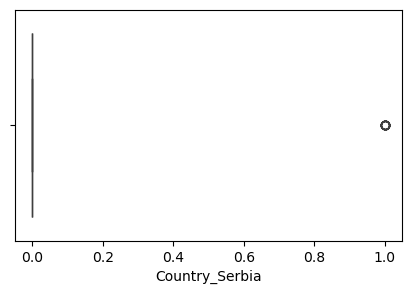

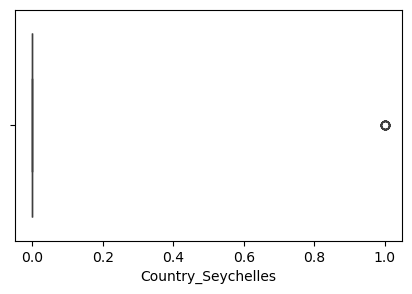

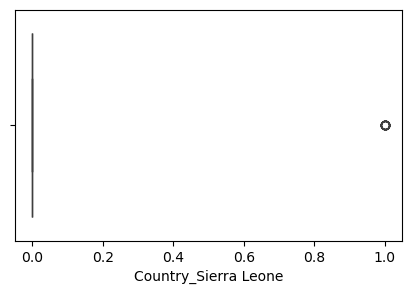

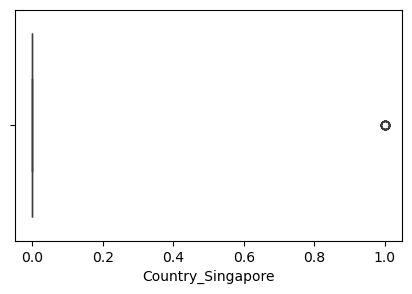

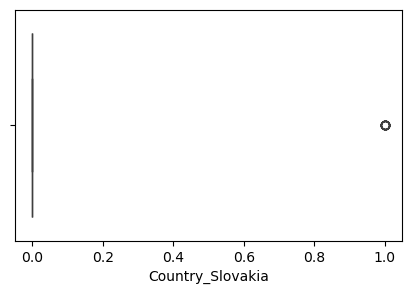

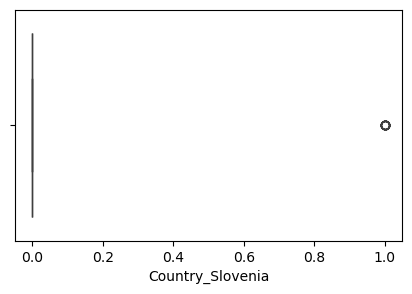

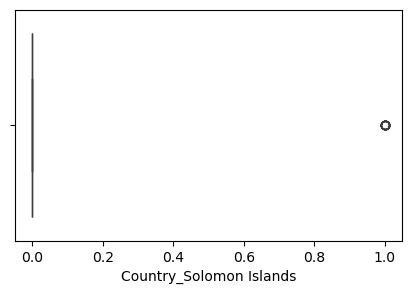

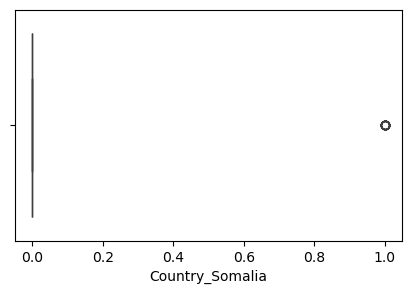

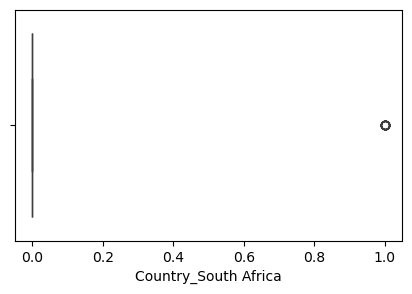

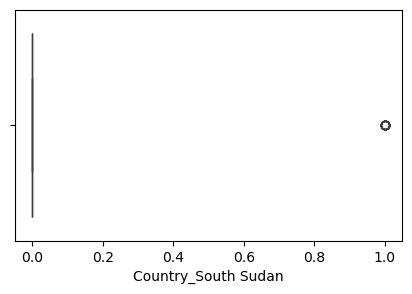

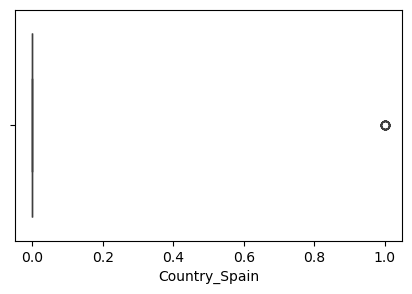

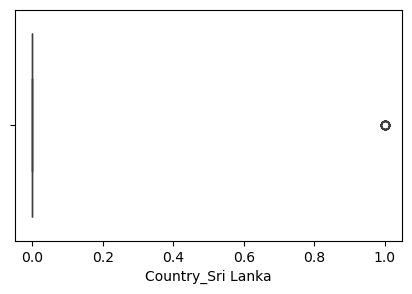

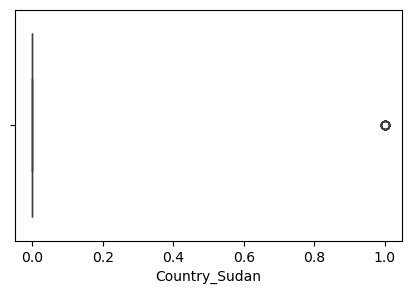

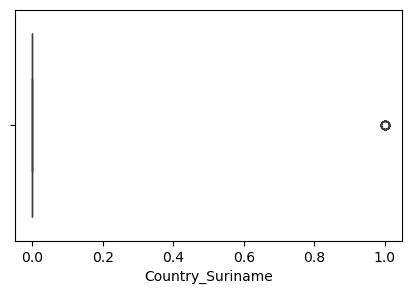

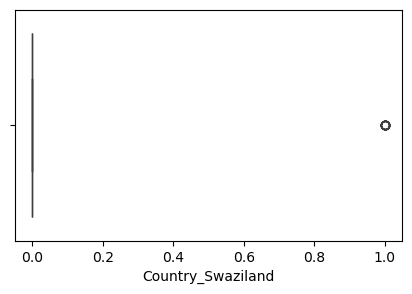

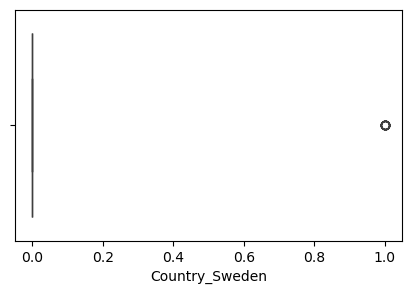

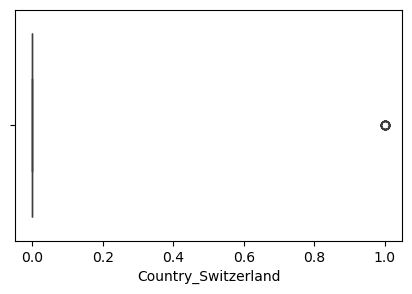

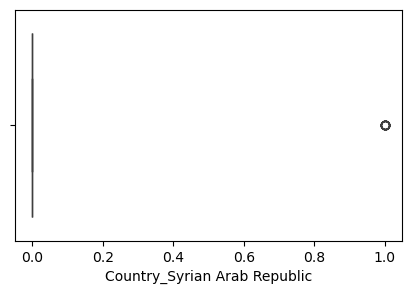

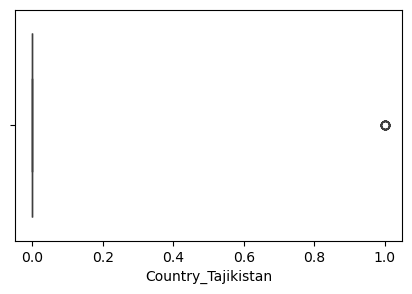

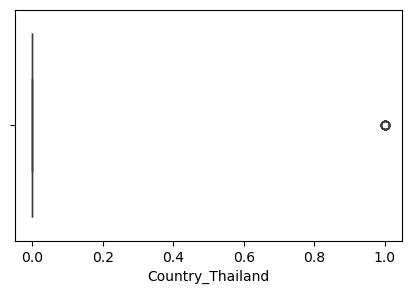

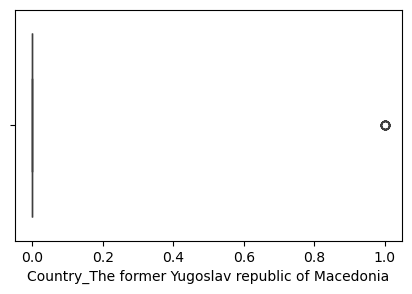

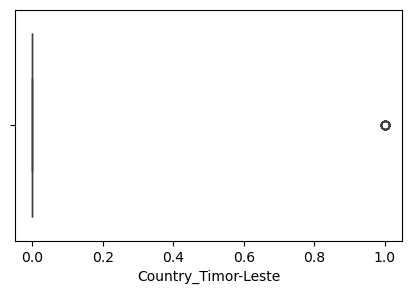

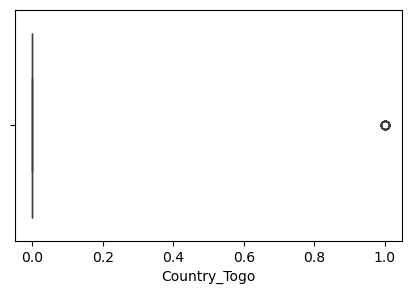

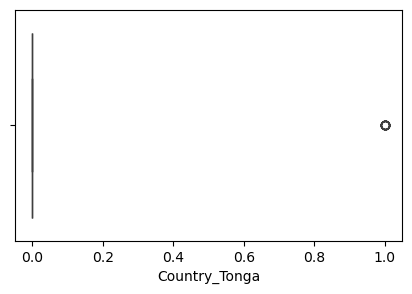

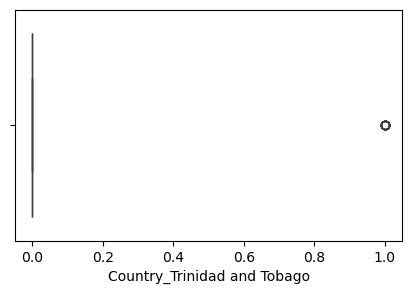

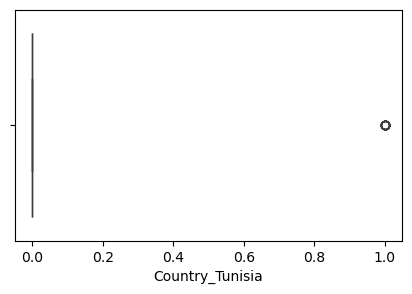

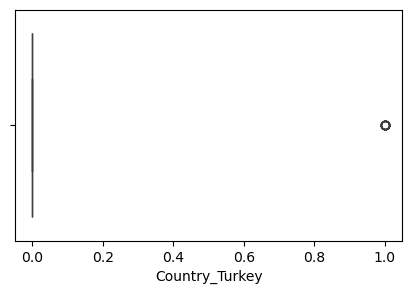

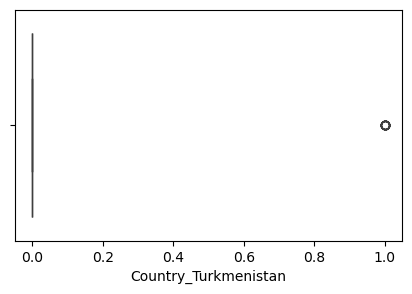

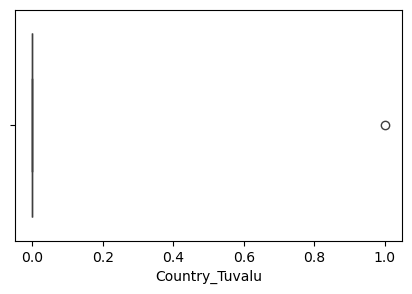

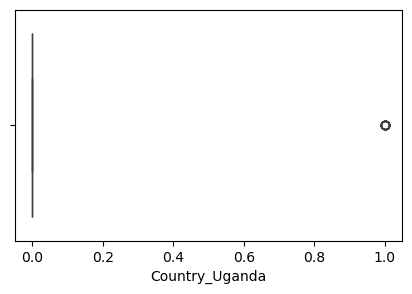

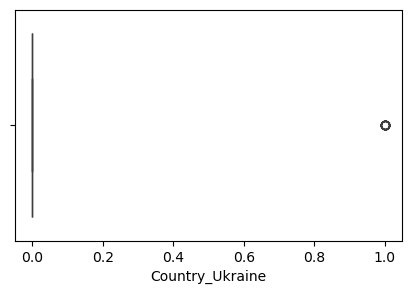

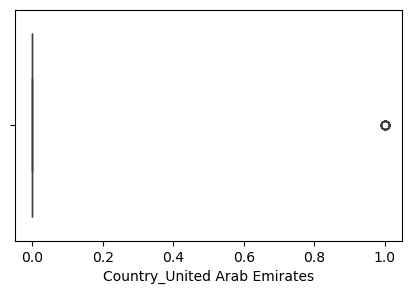

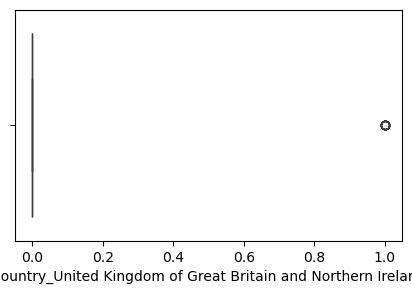

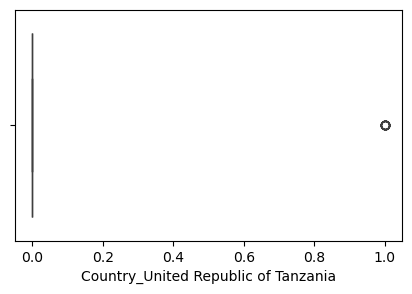

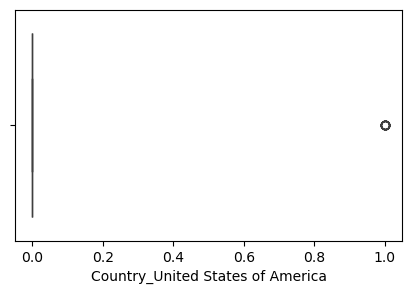

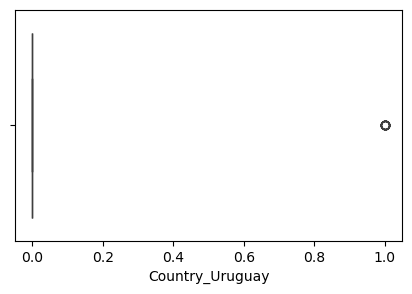

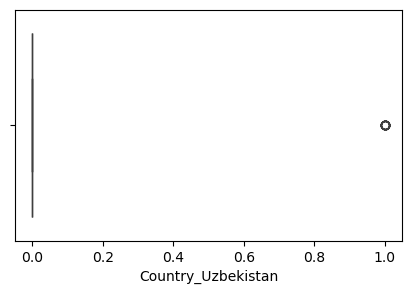

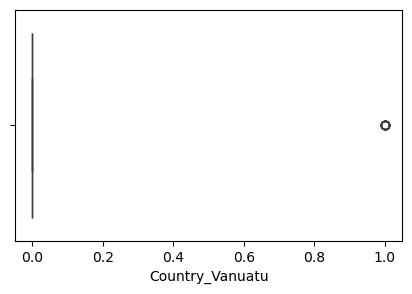

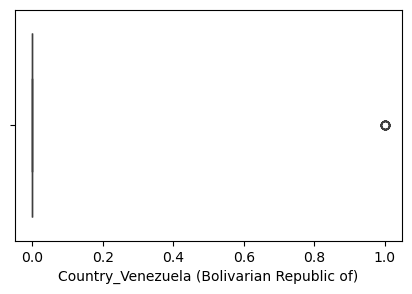

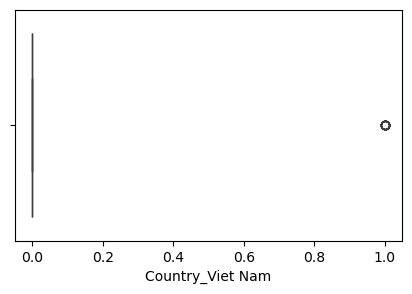

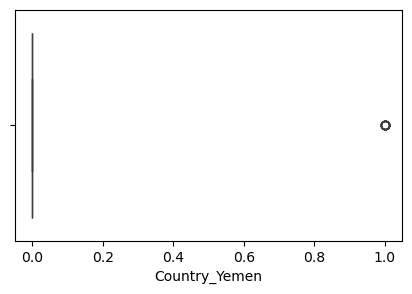

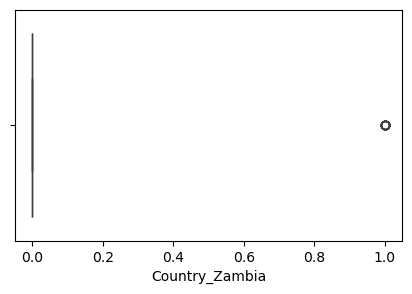

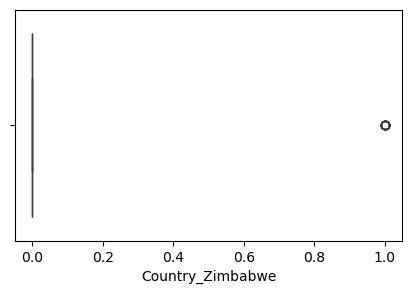

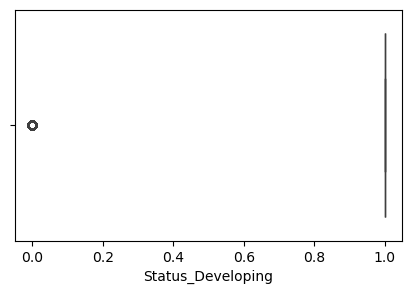

In [7]:
#finding outliers
import matplotlib.pyplot as plt
import seaborn as sns
for i in numerical.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=numerical[i])
    plt.show()
    

In [9]:
# creating function to treat outliers
def treat_outiers(f):
    import numpy as np
    for i in f.columns:
        if i == 'Life expectancy':
            continue
        if f[i].dtypes not in['float64', 'int64']:
            continue
            
        Q1 =  f[i].quantile(0.25)
        Q3 = f[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        f[i] = np.where(f[i] < lower_bound, lower_bound, np.where(f[i] > upper_bound, upper_bound, f[i]))
    return f

In [10]:
treat_outiers(life_expectancy_df)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,55.0,0.01,71.279624,65.000000,900.625,19.1,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014.0,59.9,271.0,55.0,0.01,73.523582,62.000000,492.000,18.6,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013.0,59.9,268.0,55.0,0.01,73.219243,64.000000,430.000,18.1,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2012.0,59.5,272.0,55.0,0.01,78.184215,67.000000,900.625,17.6,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011.0,59.2,275.0,55.0,0.01,7.097109,68.000000,900.625,17.2,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.6,456.5,27.0,4.36,0.000000,68.000000,31.000,27.1,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2934,2003.0,44.6,456.5,26.0,4.06,0.000000,58.351153,900.625,26.7,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.000000,304.000,26.3,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2936,2001.0,45.3,456.5,25.0,1.72,0.000000,76.000000,529.000,25.9,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


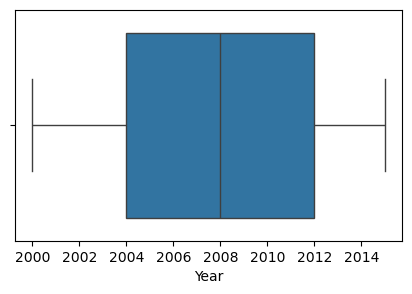

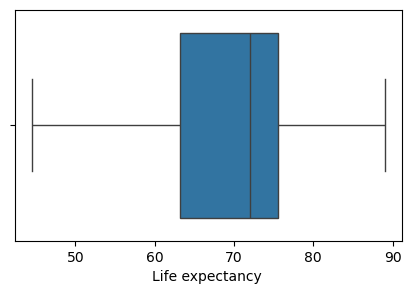

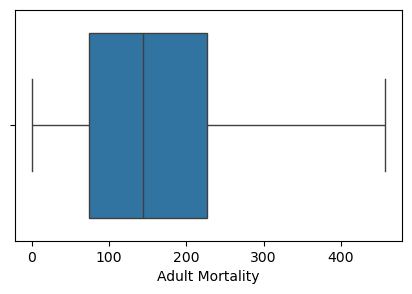

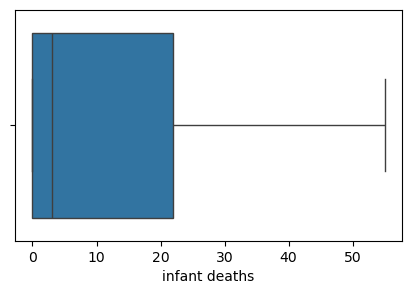

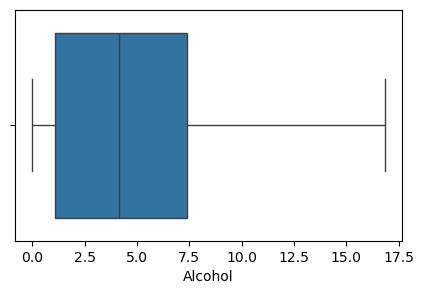

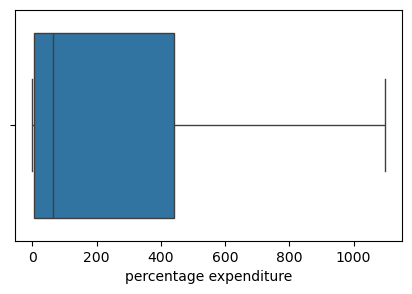

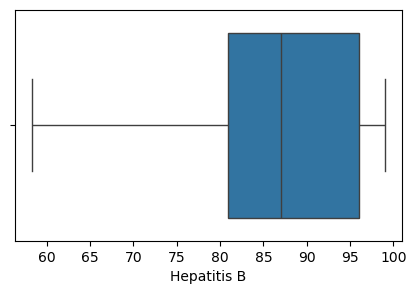

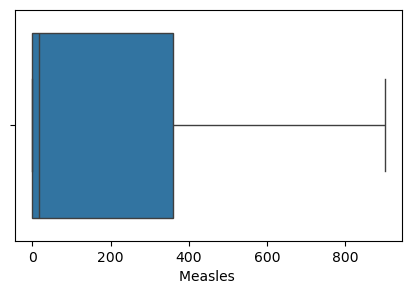

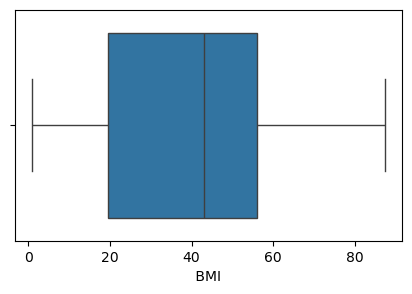

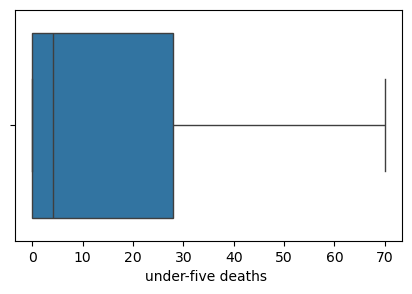

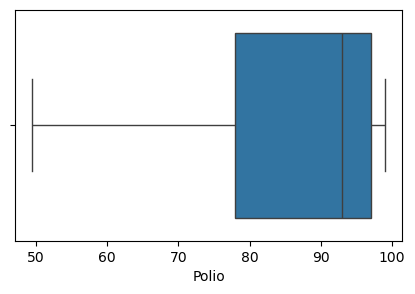

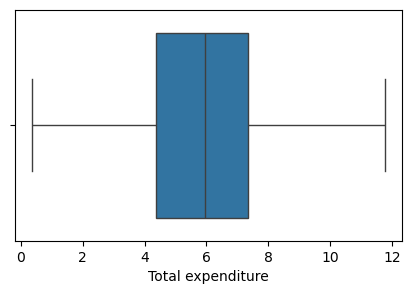

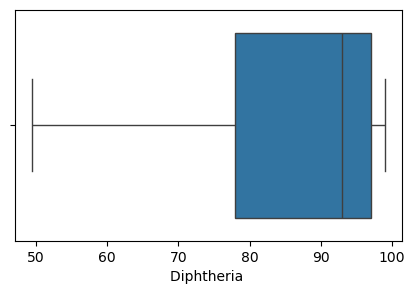

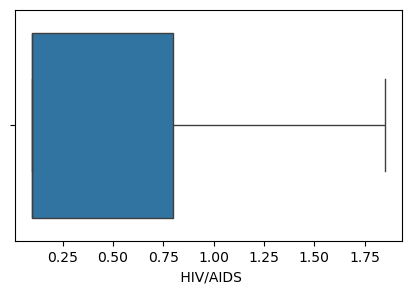

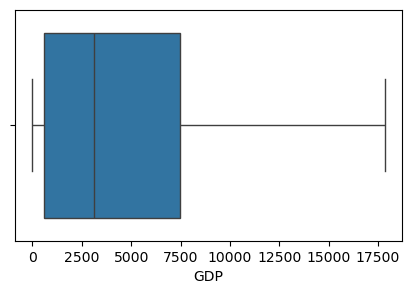

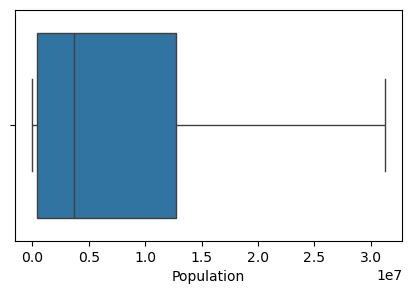

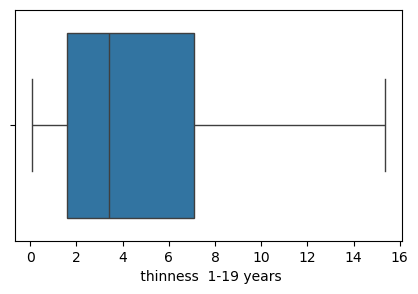

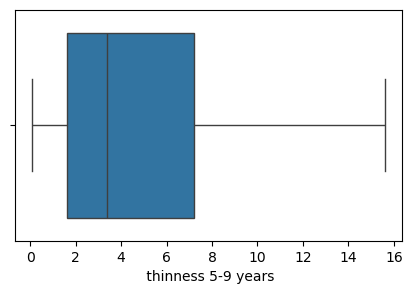

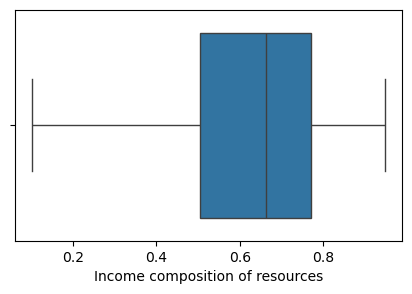

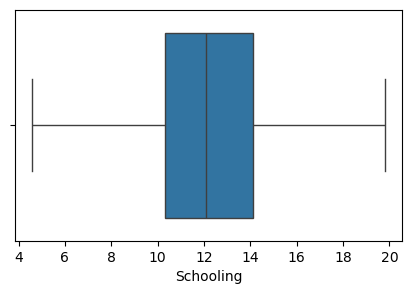

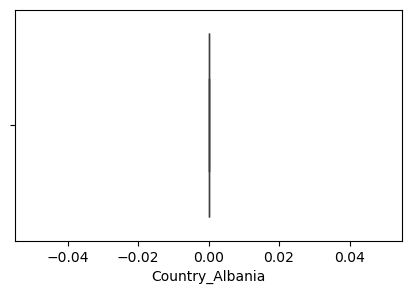

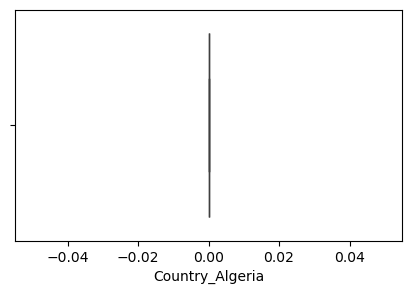

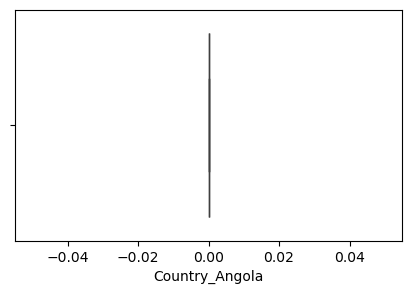

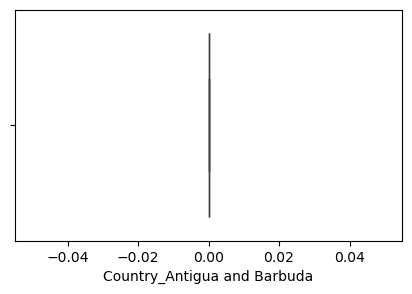

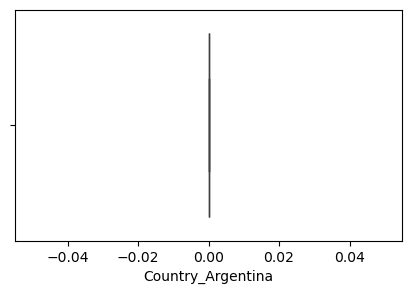

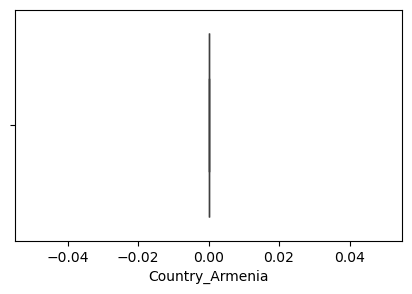

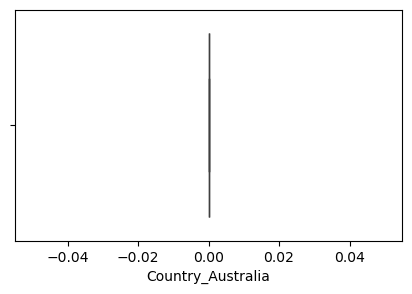

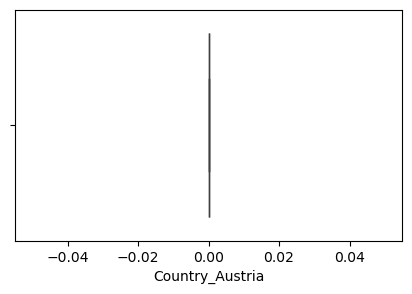

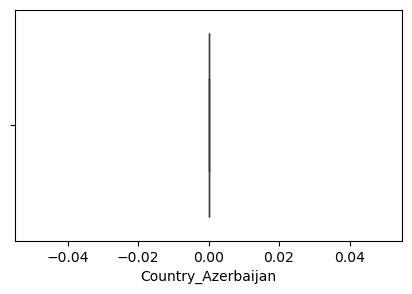

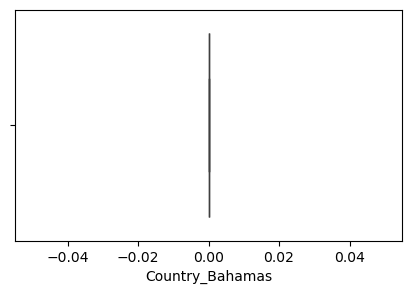

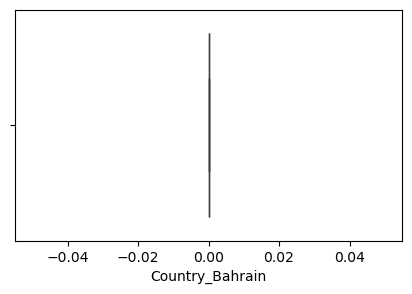

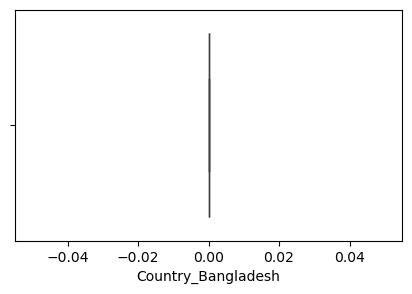

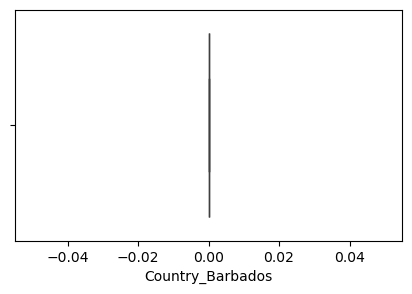

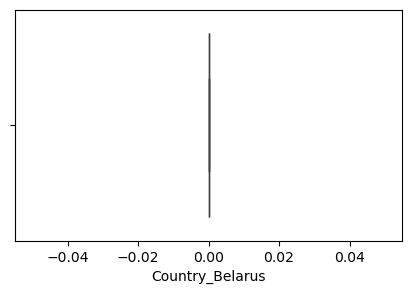

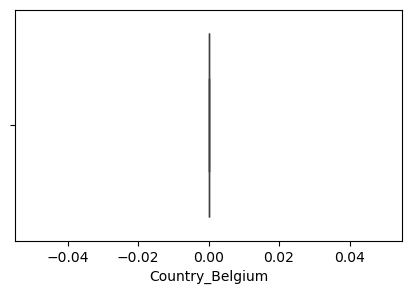

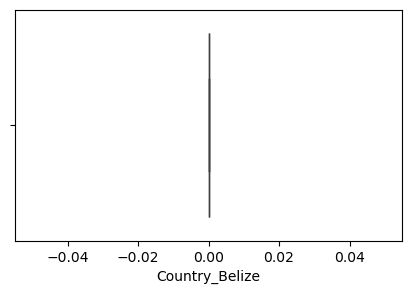

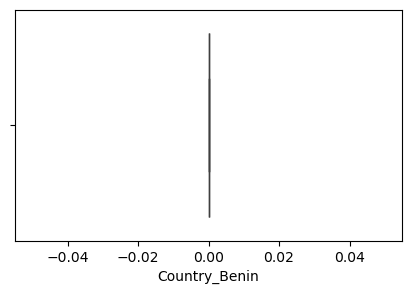

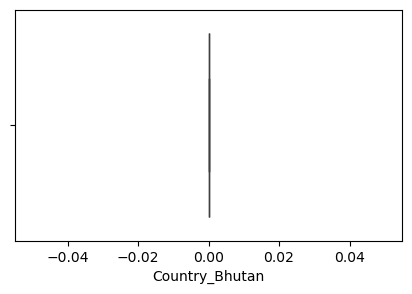

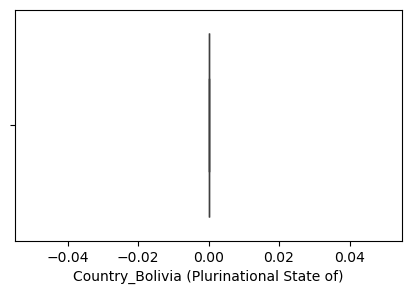

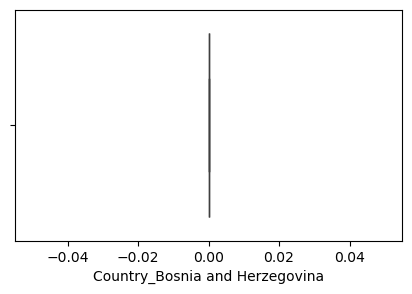

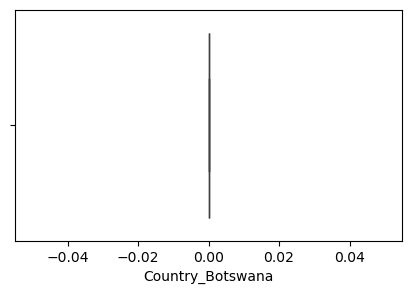

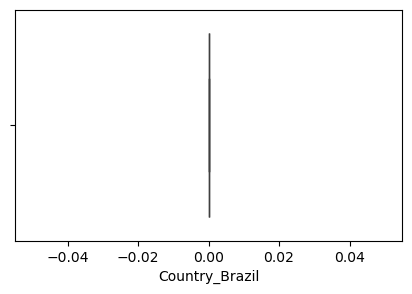

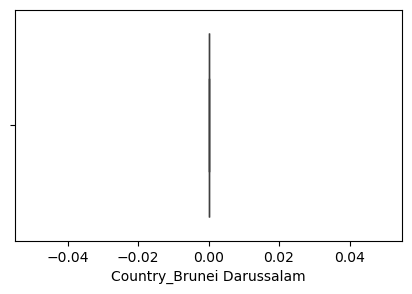

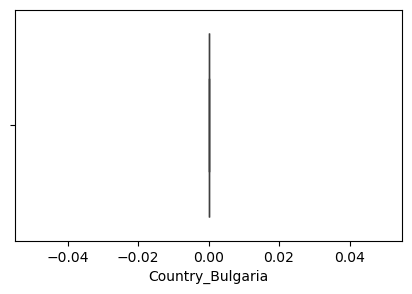

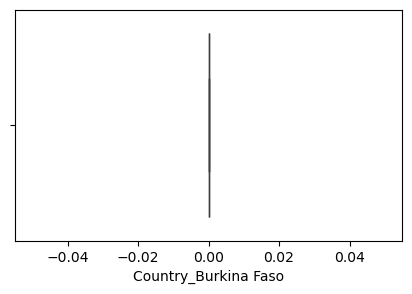

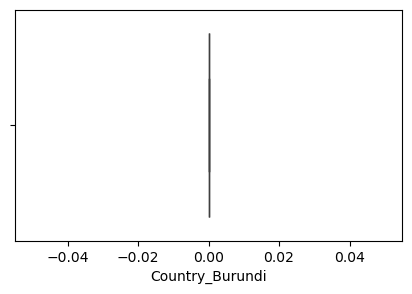

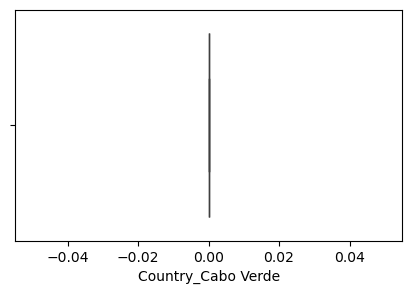

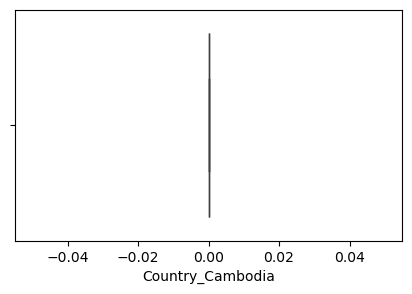

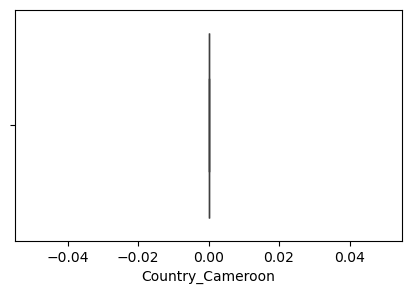

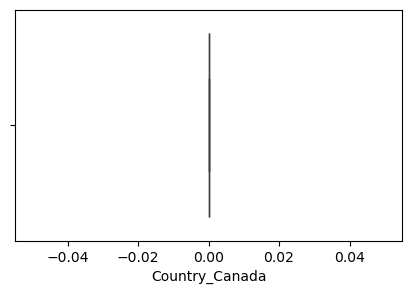

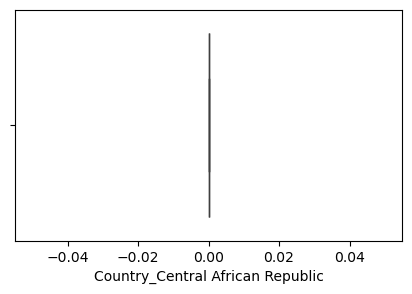

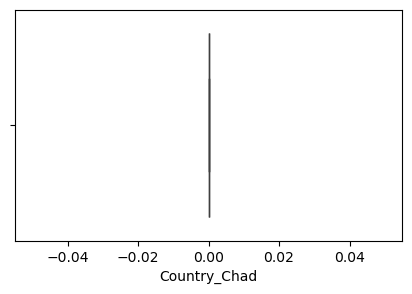

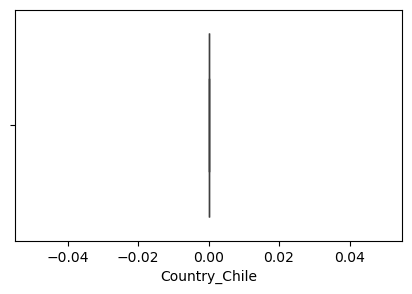

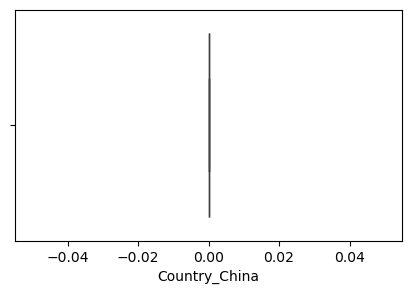

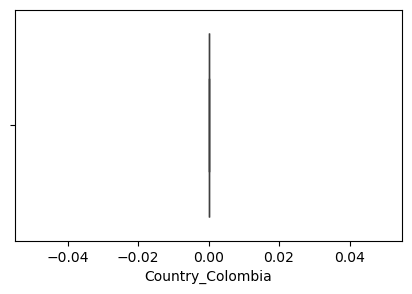

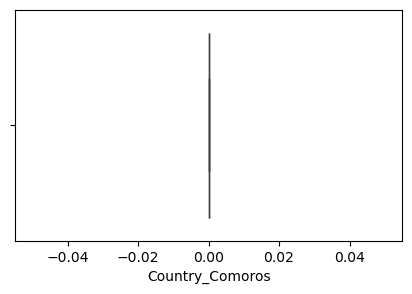

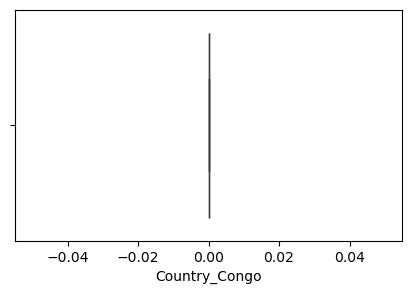

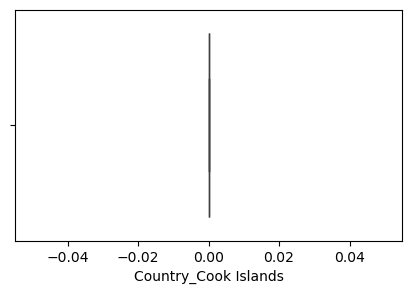

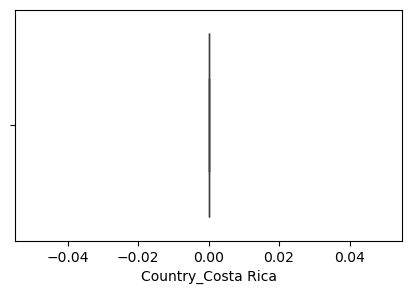

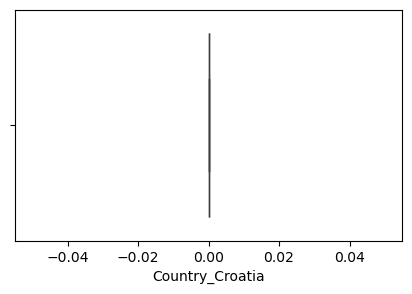

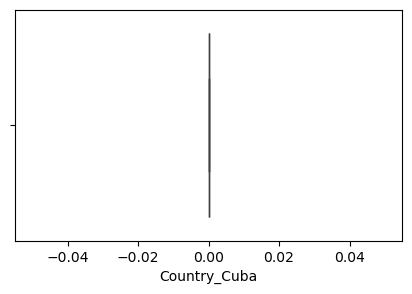

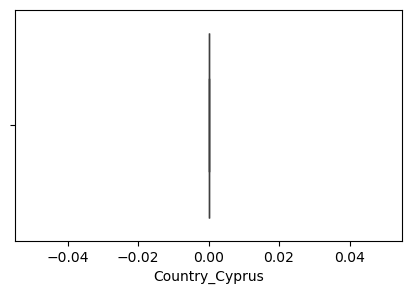

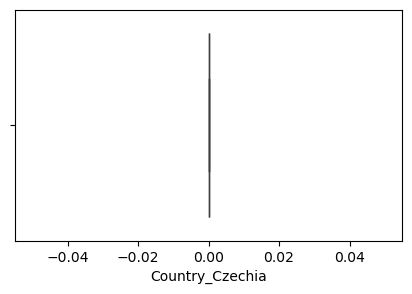

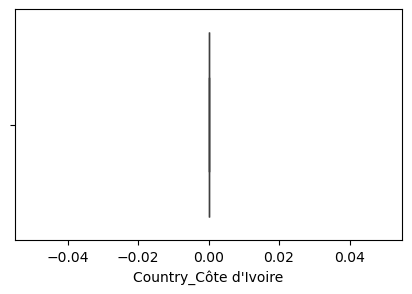

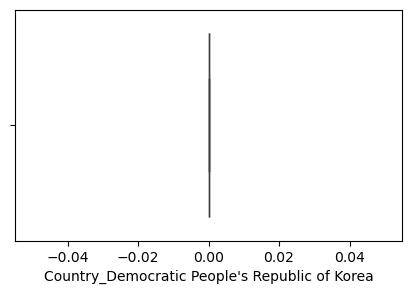

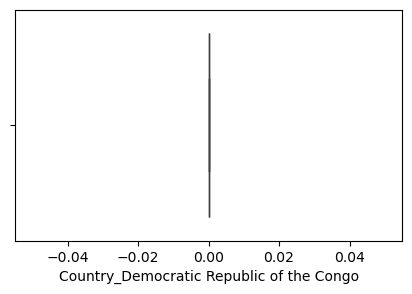

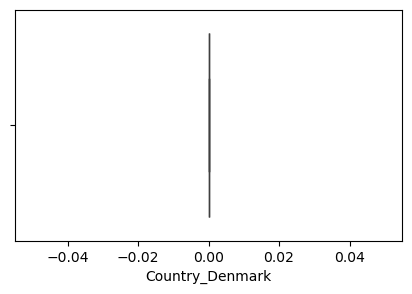

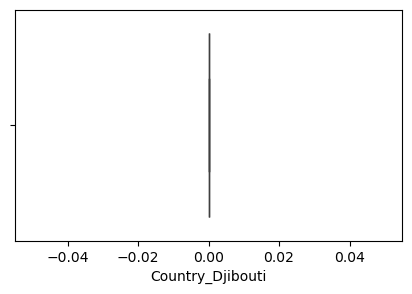

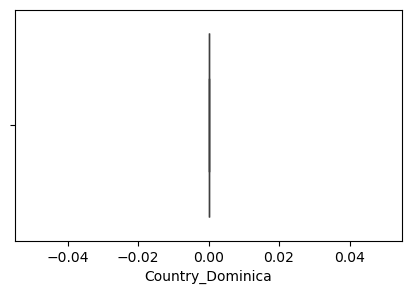

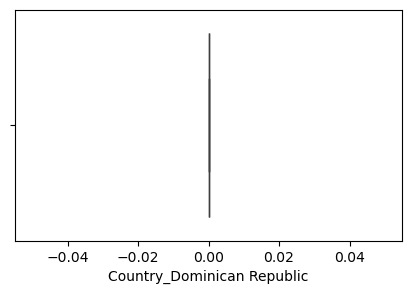

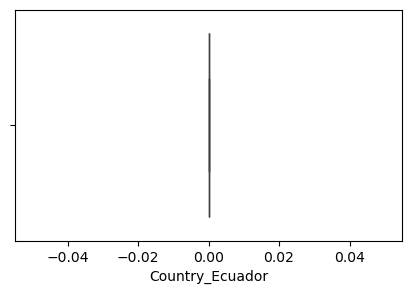

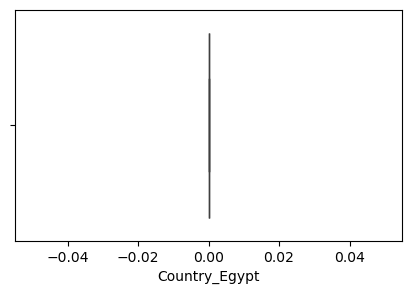

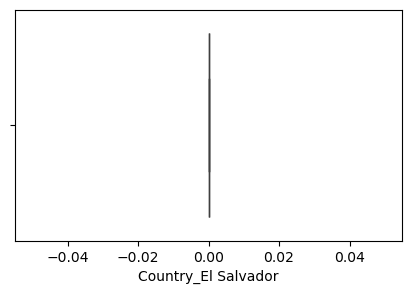

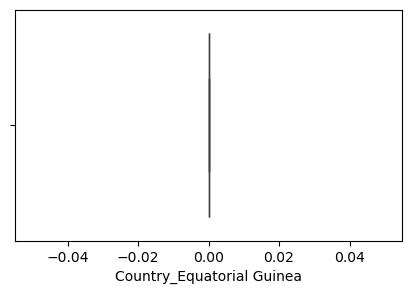

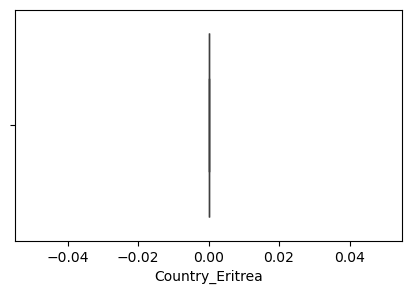

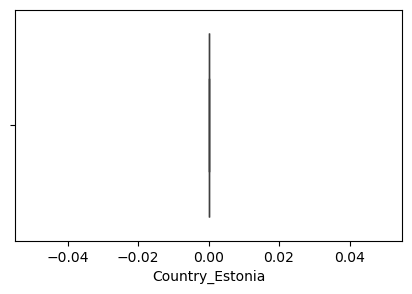

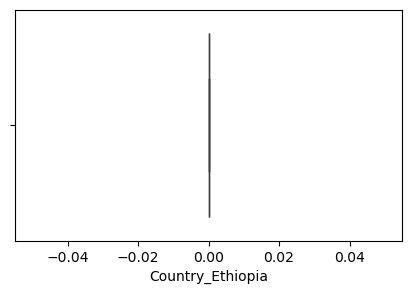

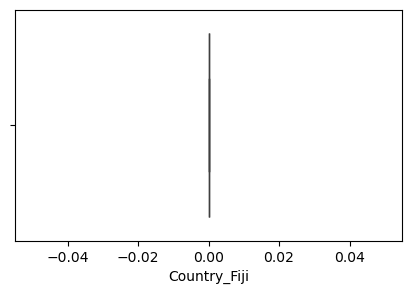

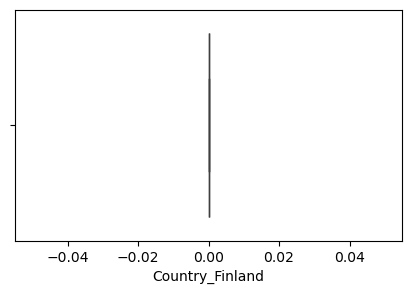

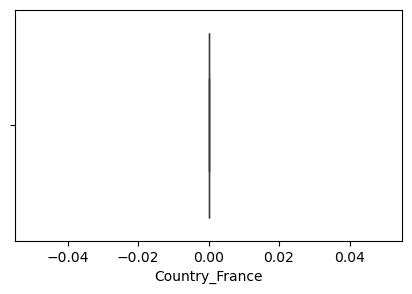

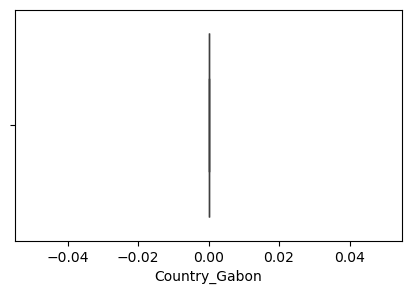

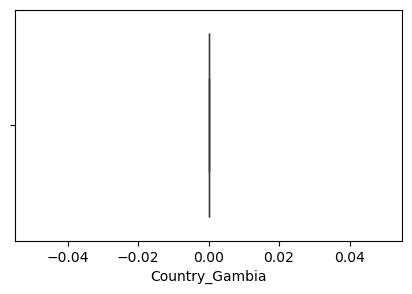

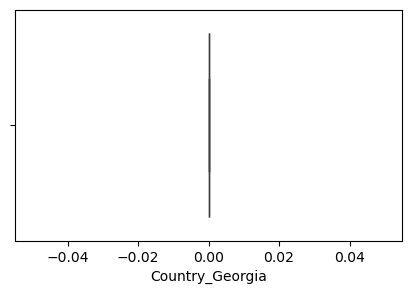

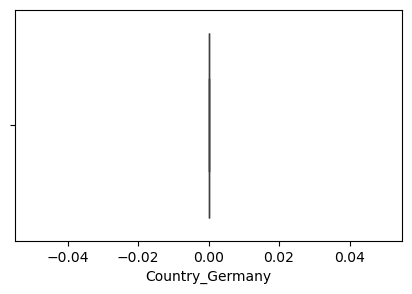

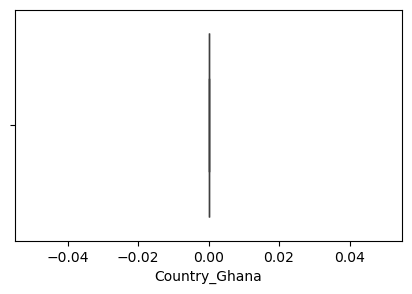

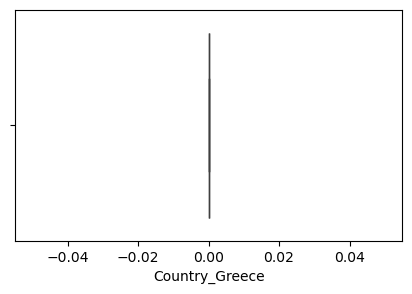

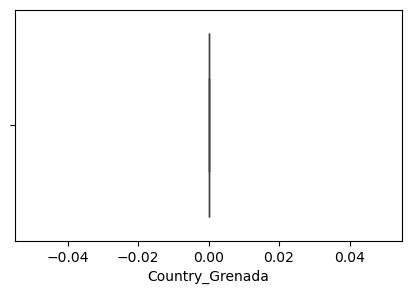

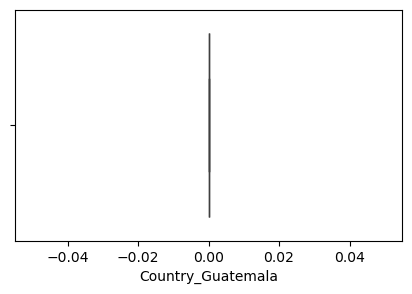

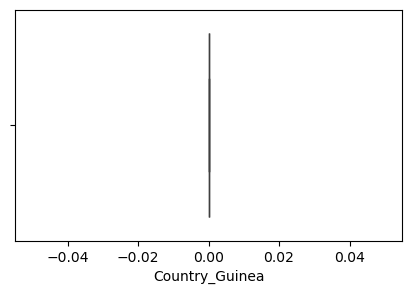

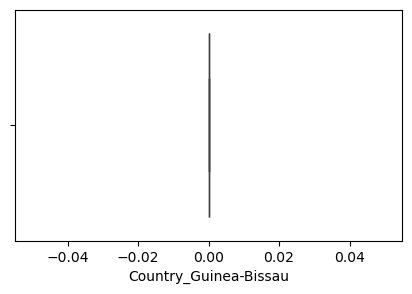

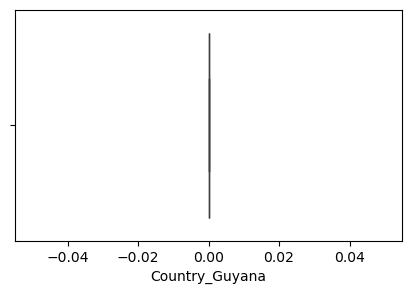

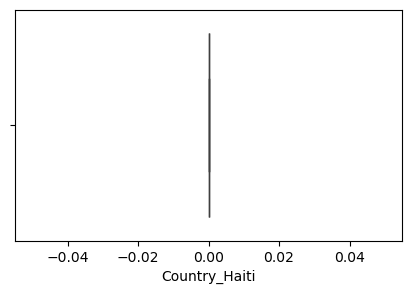

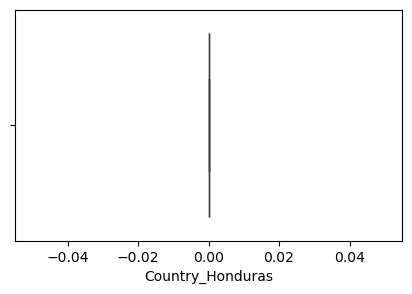

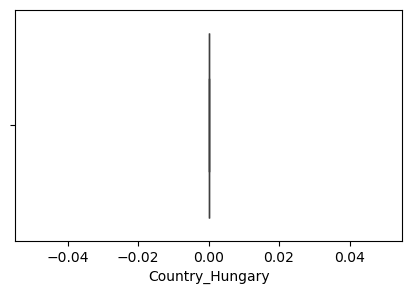

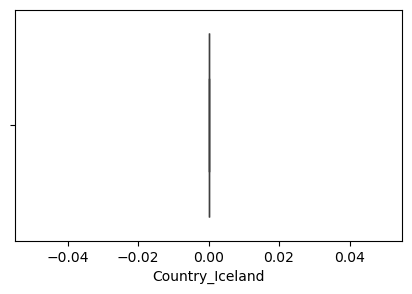

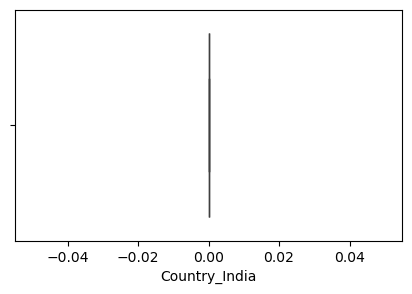

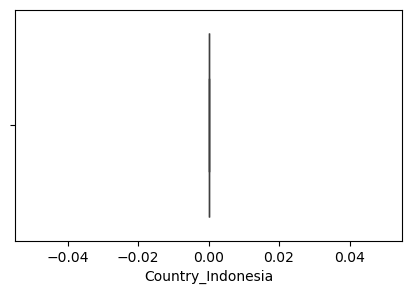

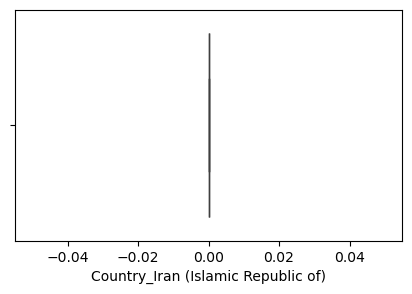

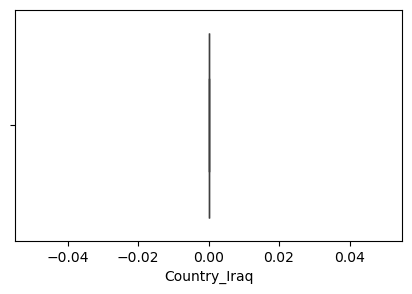

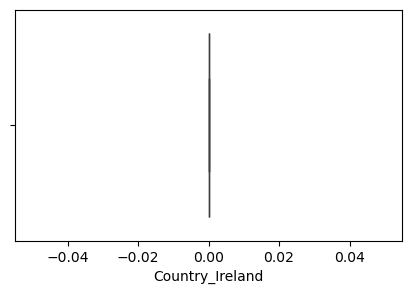

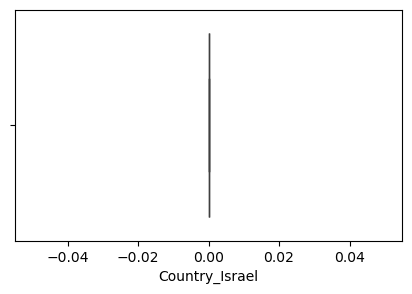

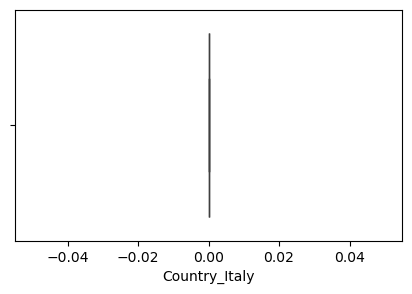

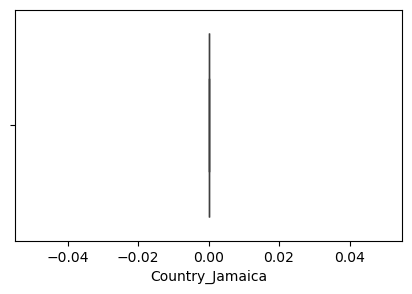

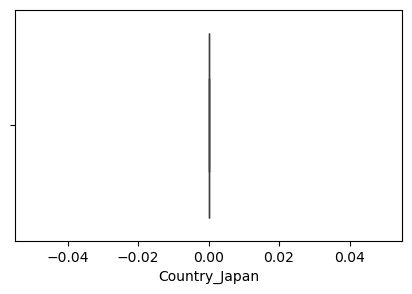

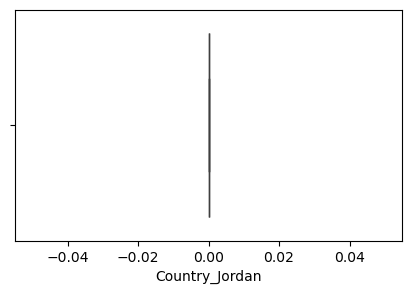

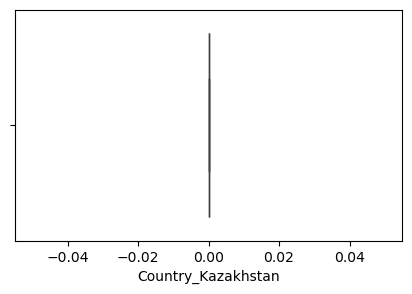

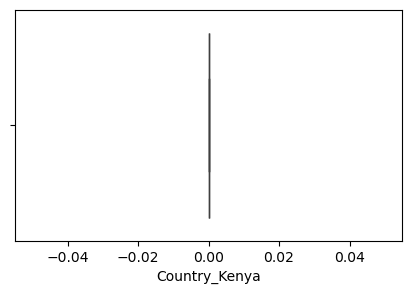

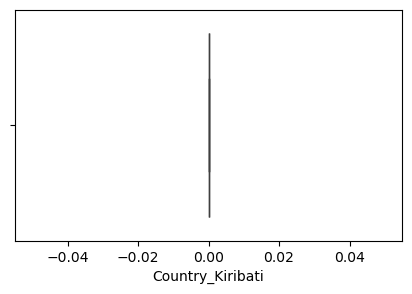

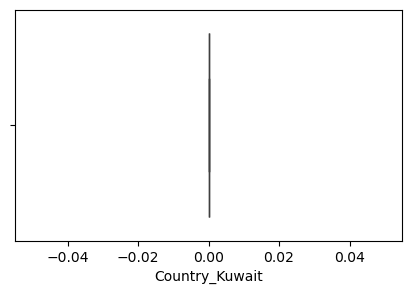

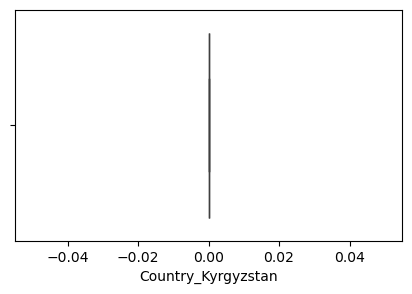

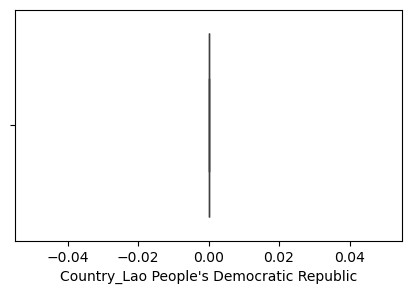

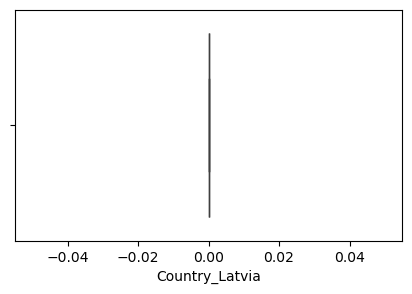

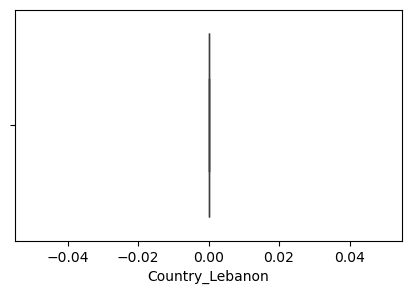

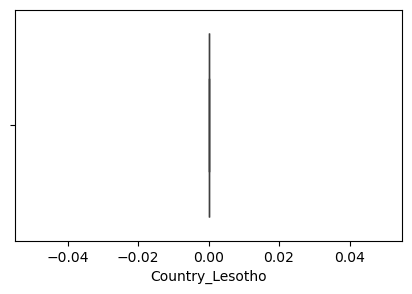

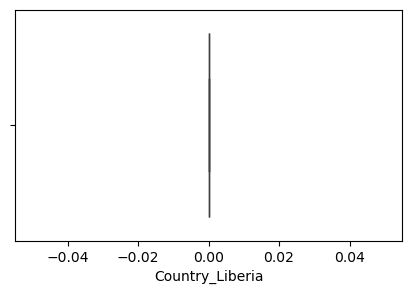

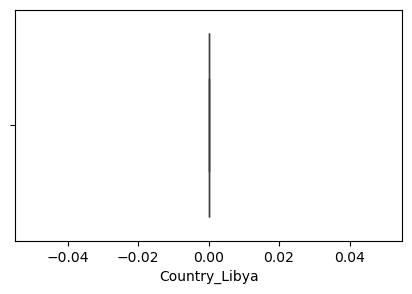

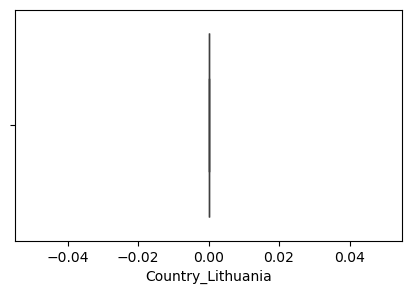

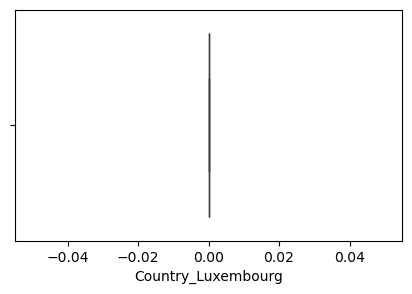

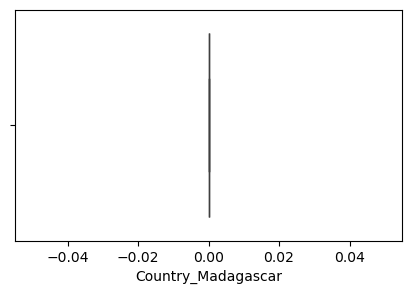

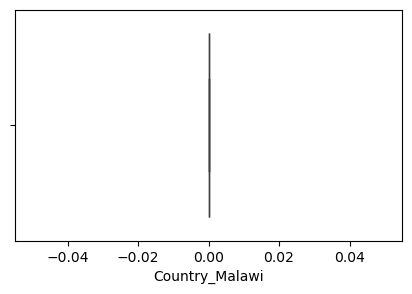

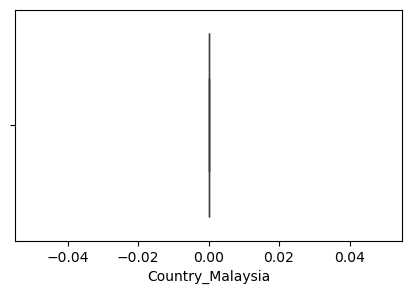

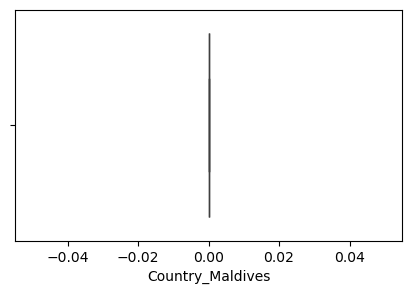

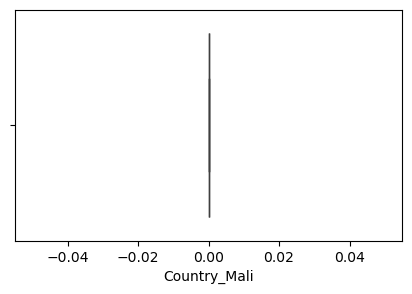

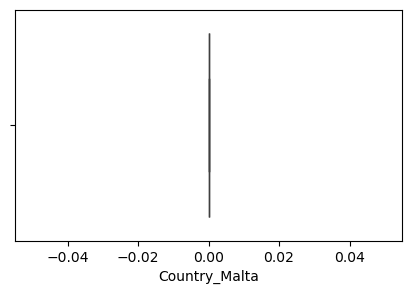

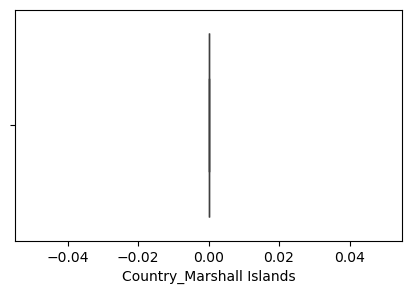

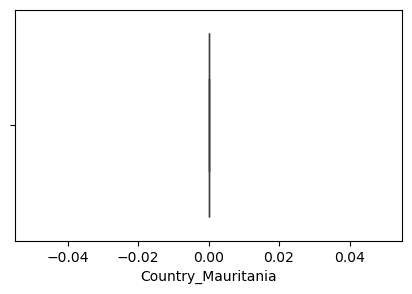

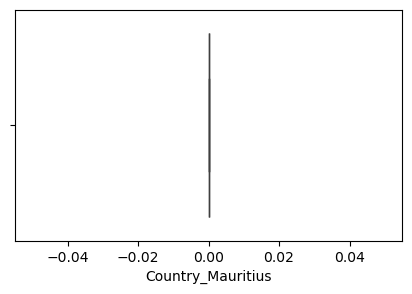

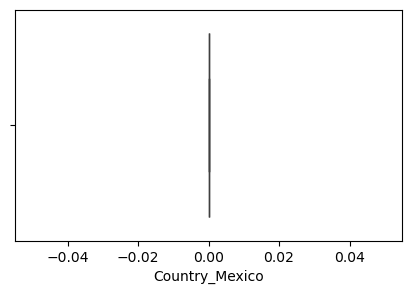

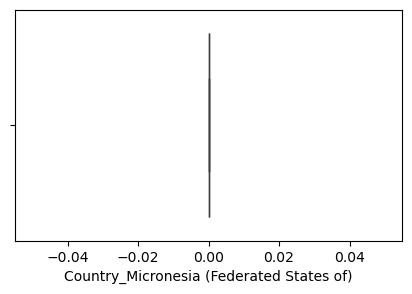

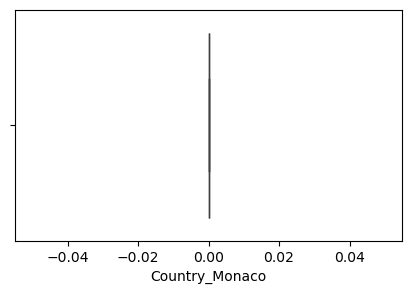

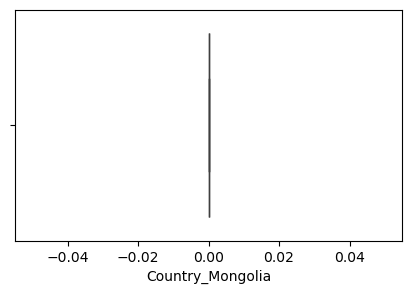

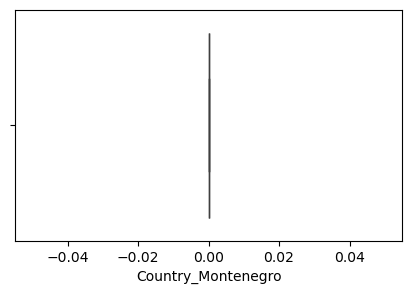

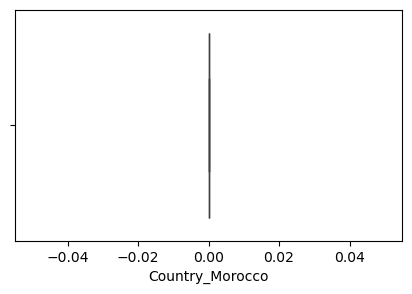

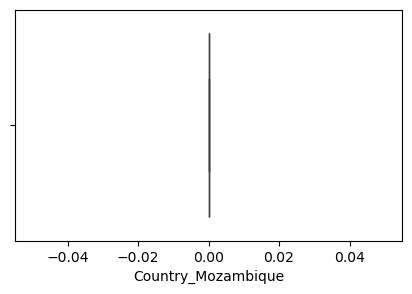

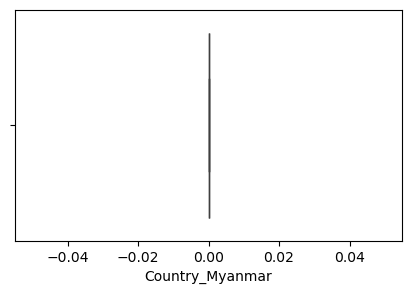

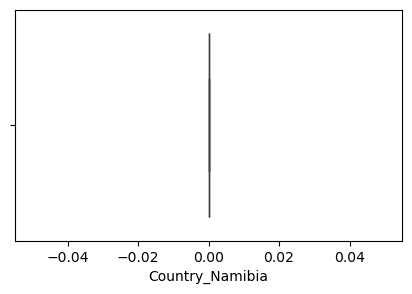

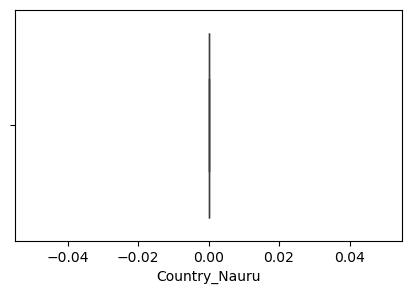

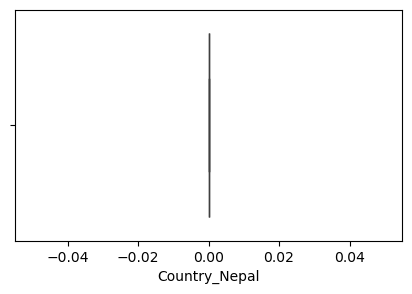

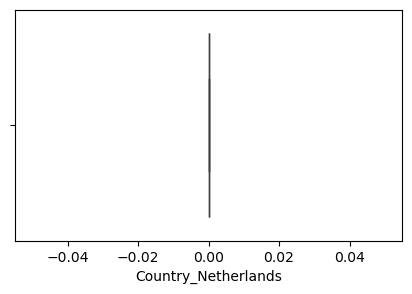

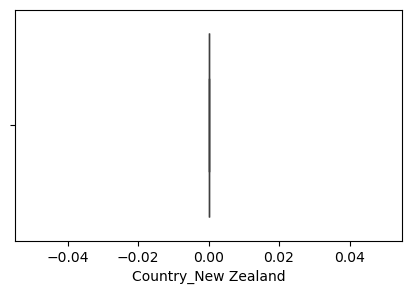

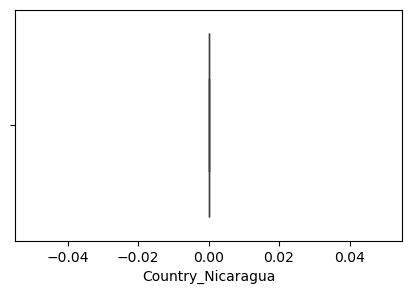

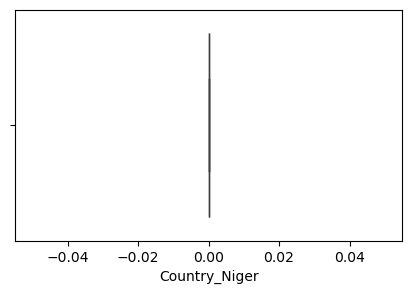

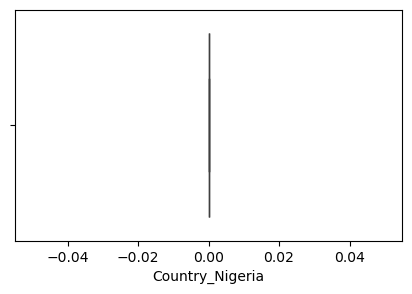

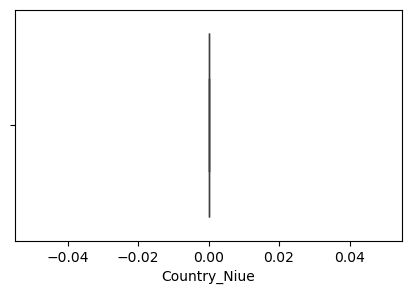

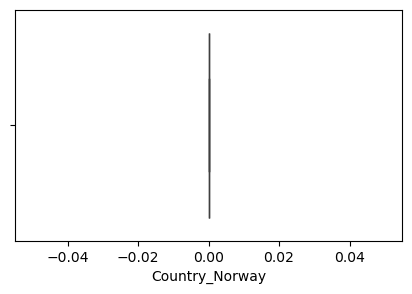

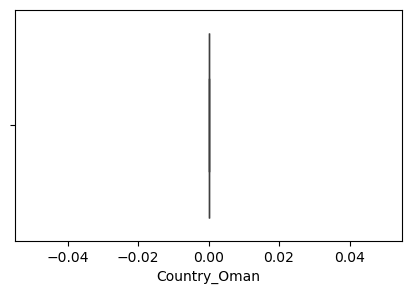

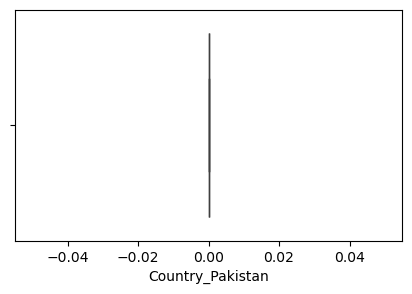

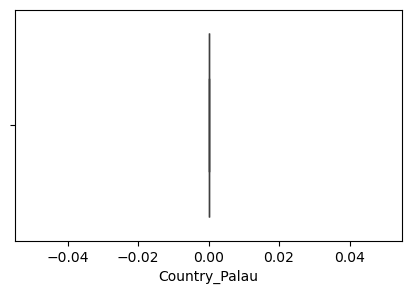

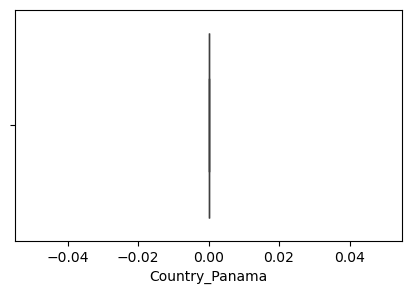

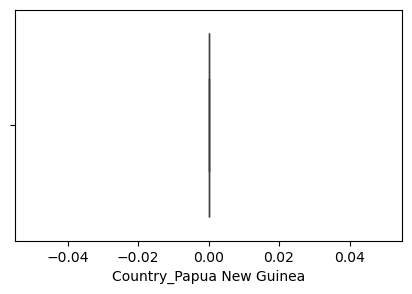

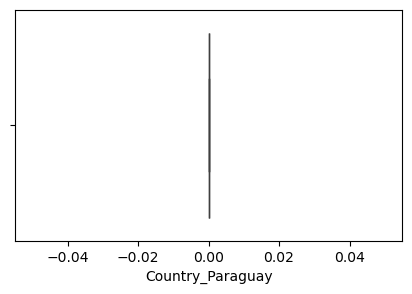

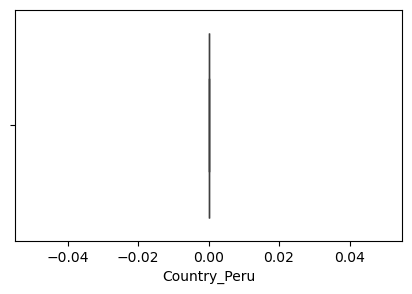

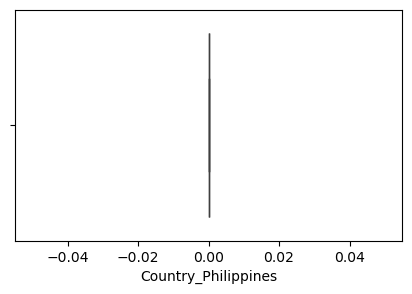

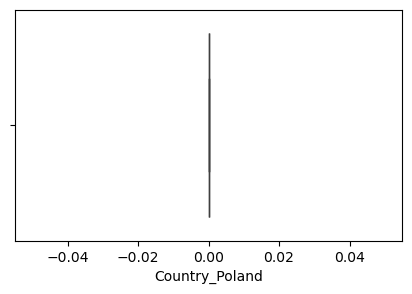

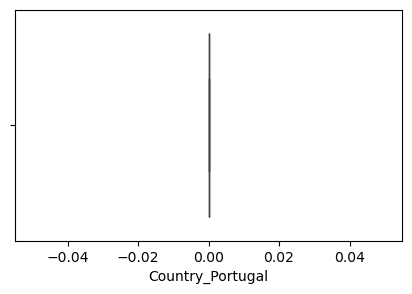

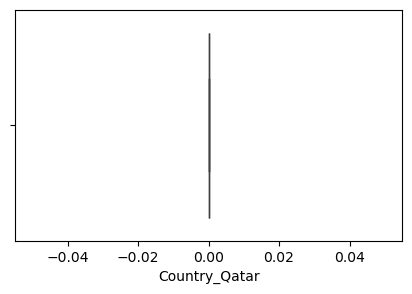

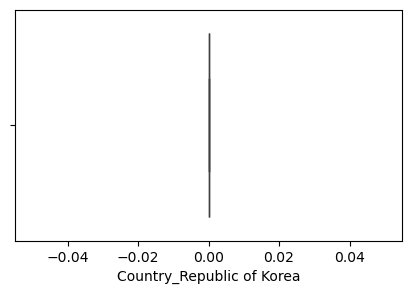

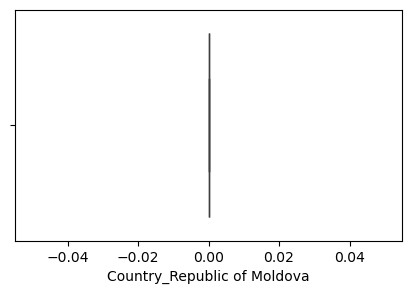

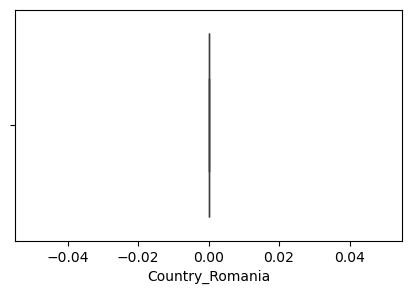

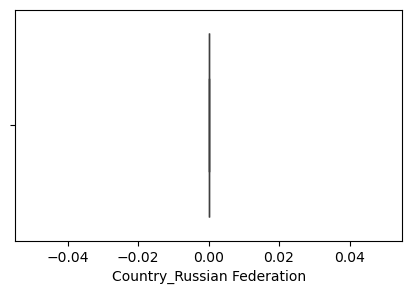

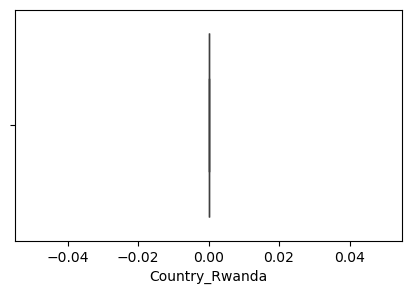

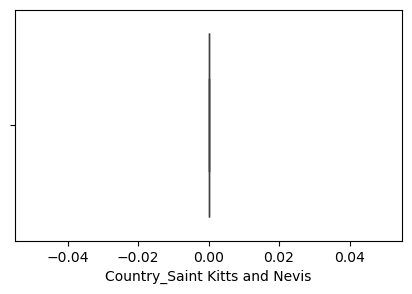

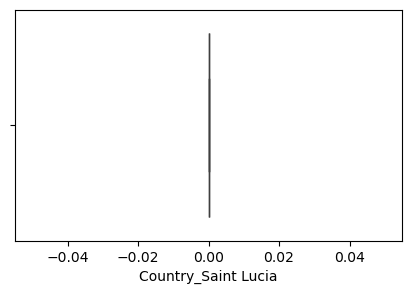

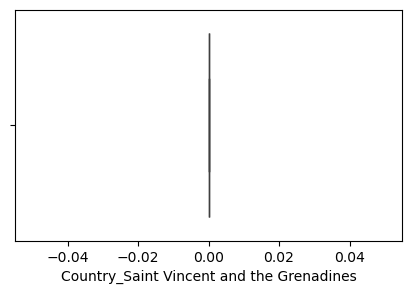

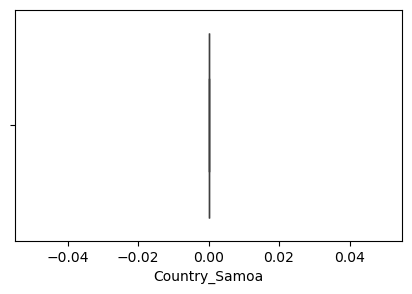

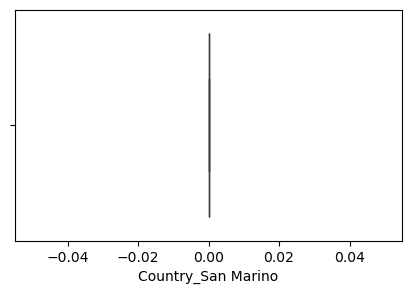

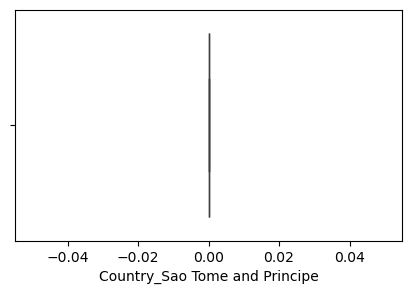

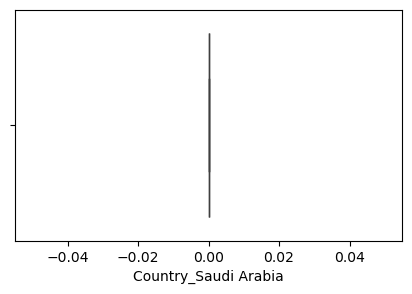

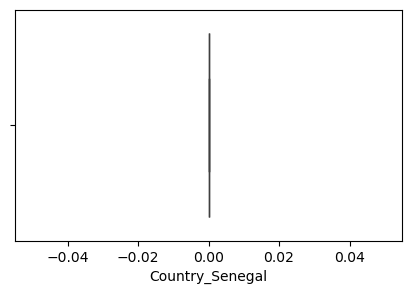

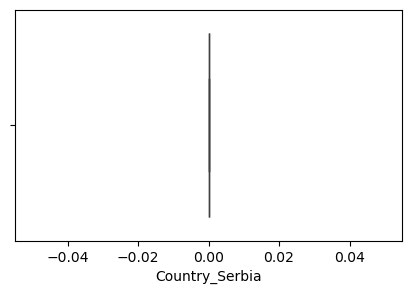

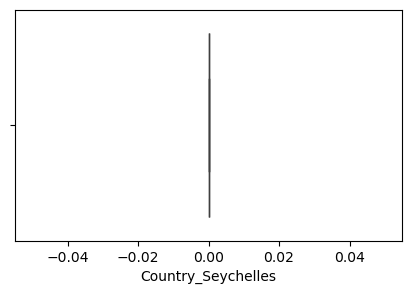

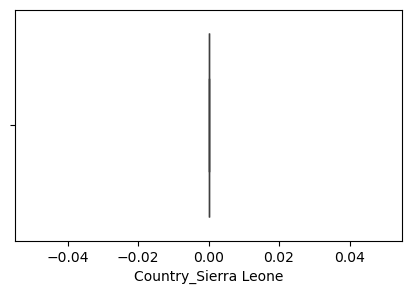

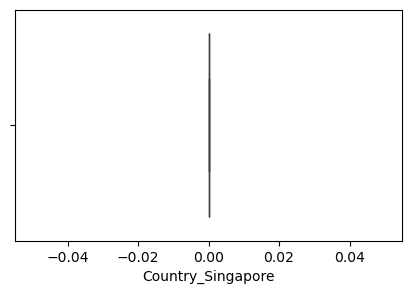

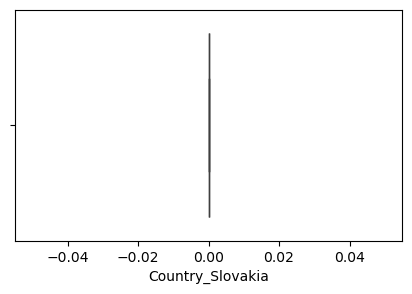

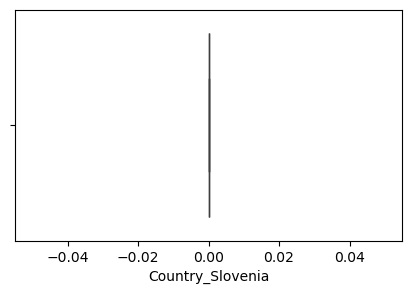

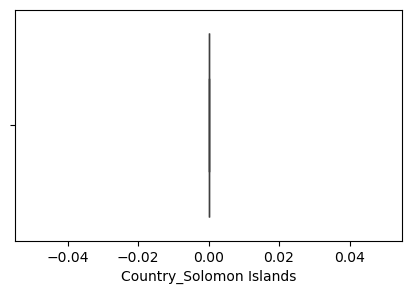

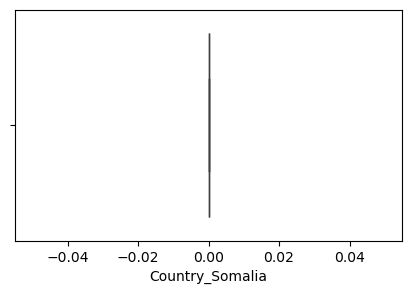

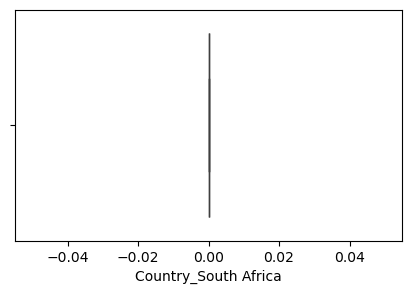

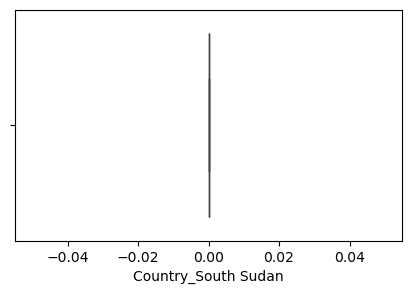

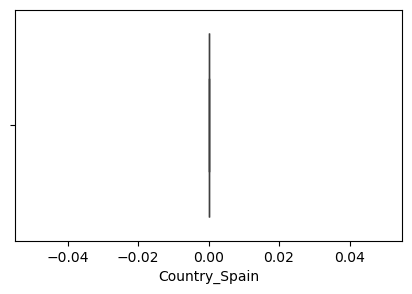

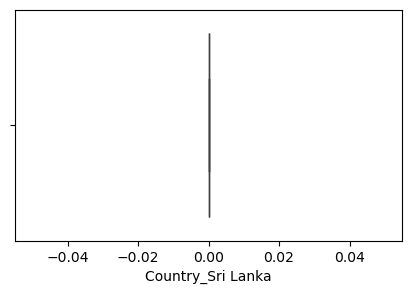

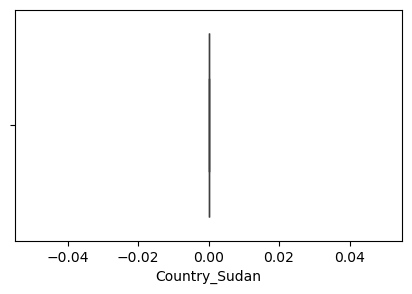

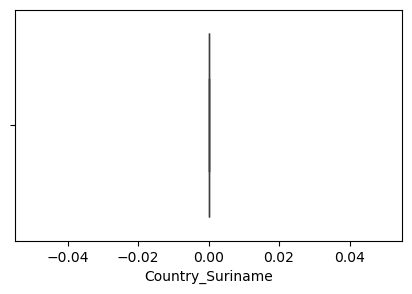

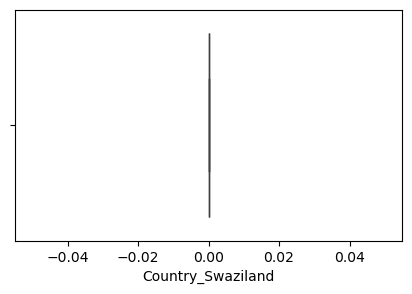

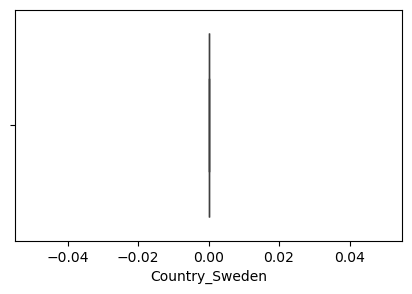

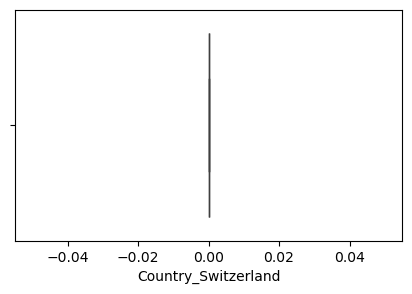

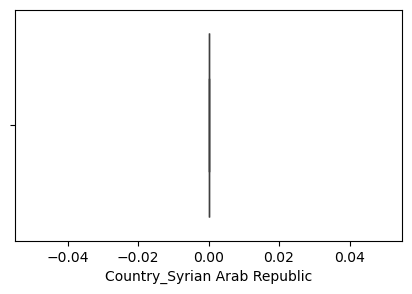

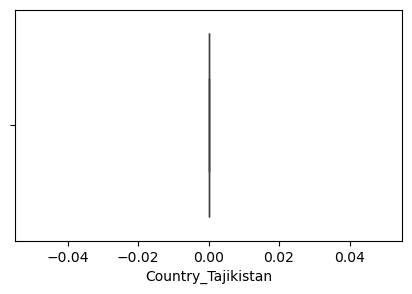

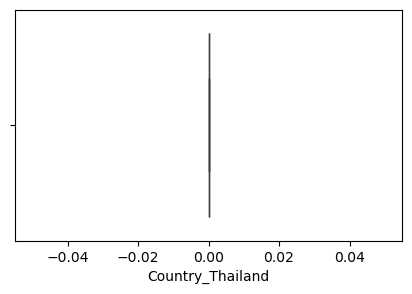

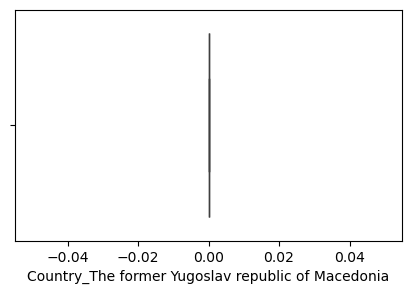

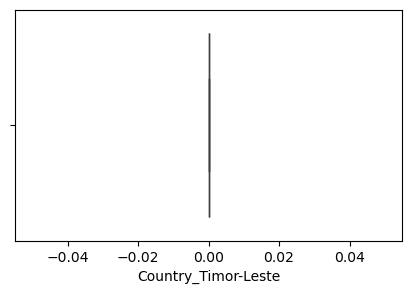

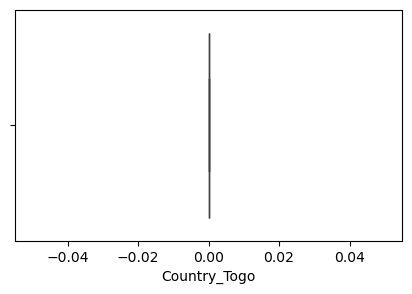

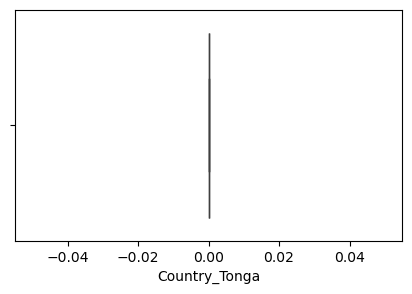

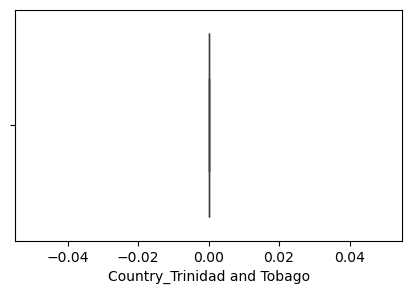

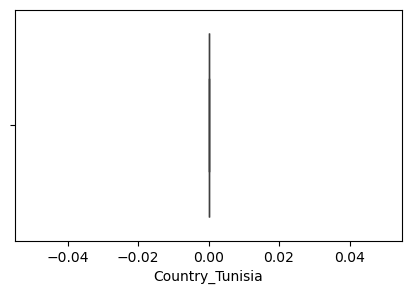

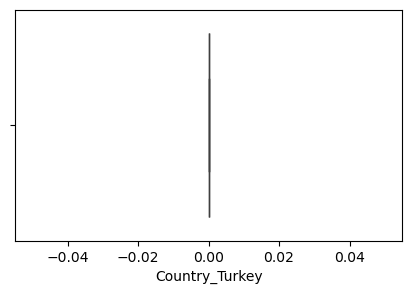

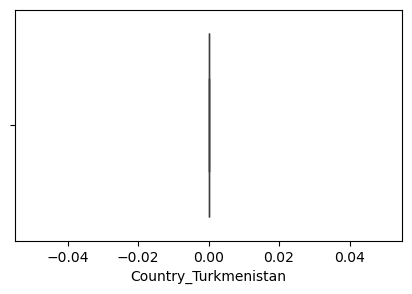

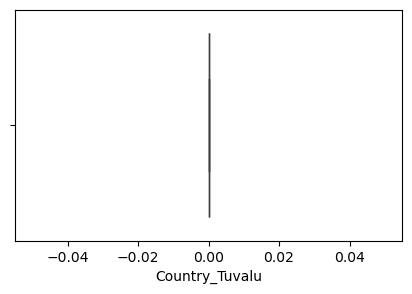

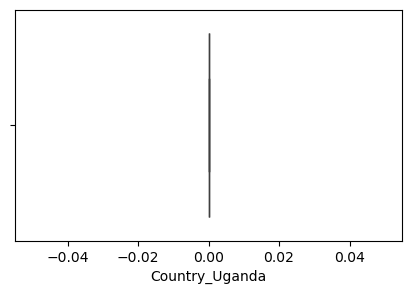

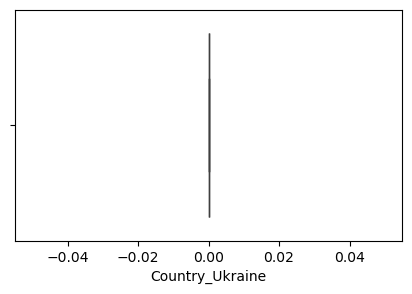

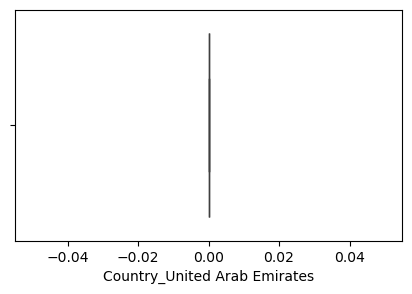

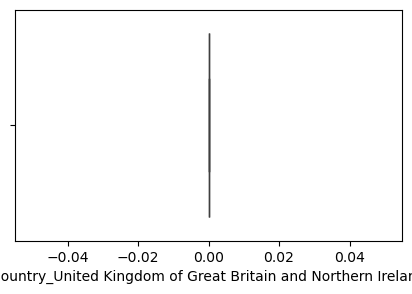

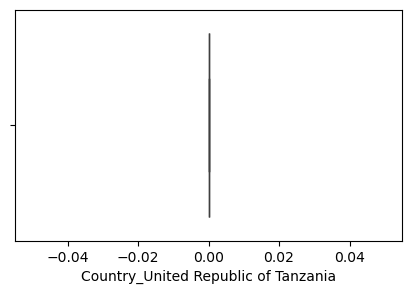

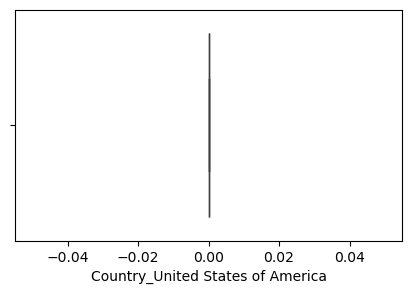

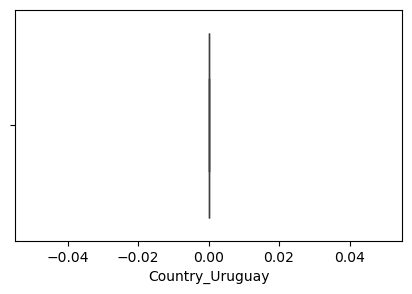

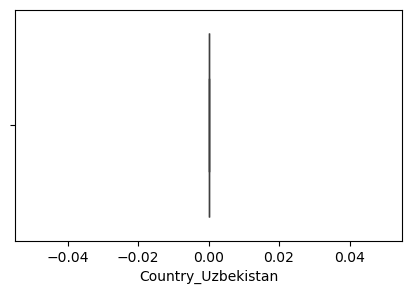

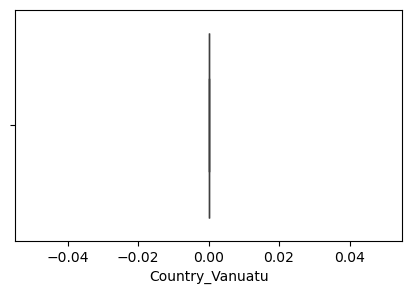

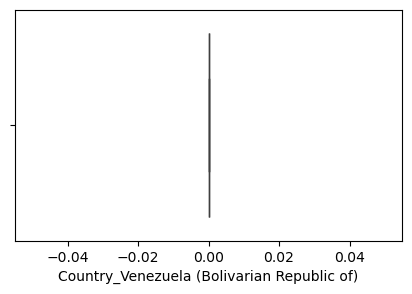

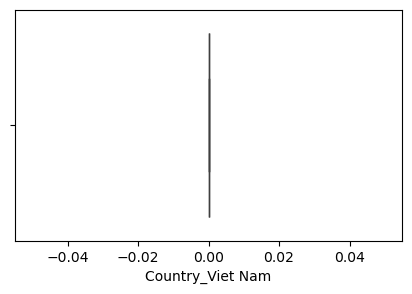

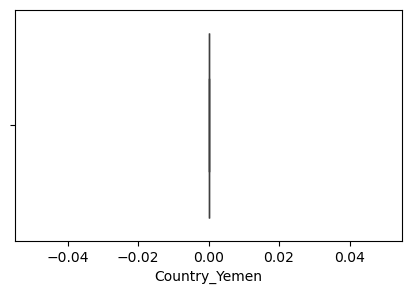

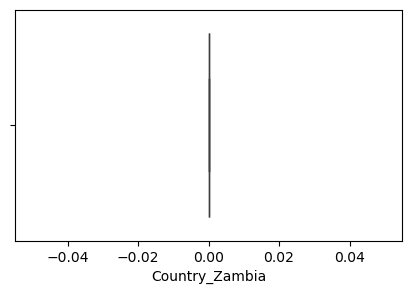

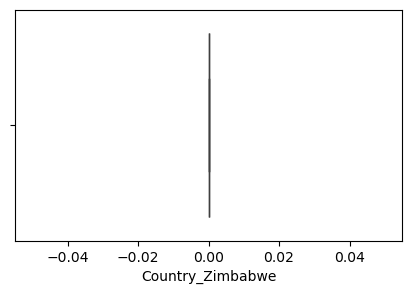

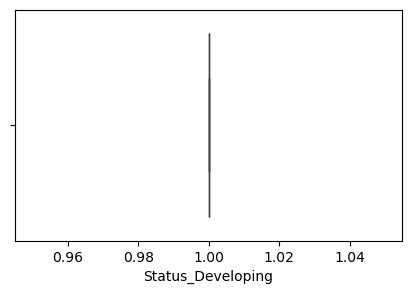

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in life_expectancy_df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=life_expectancy_df[i])
    plt.show()
    

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

x_constant = sm.add_constant(life_expectancy_df).astype(float) # this will add constant column

# priting vif table to check multicollinearity

# trying it inside try and expect for exception handling
try:
    vif_data = pd.DataFrame()
    vif_data['Features'] = x_constant.columns 
    vif_data['data'] = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
    print(vif_data)
    
except Exception as e:
    print(vif_data)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


              Features           data
0                 Year       1.167908
1     Life expectancy        6.780087
2      Adult Mortality       1.997255
3        infant deaths     109.900714
4              Alcohol       1.669517
..                 ...            ...
208   Country_Viet Nam            NaN
209      Country_Yemen            NaN
210     Country_Zambia            NaN
211   Country_Zimbabwe            NaN
212  Status_Developing  217575.847095

[213 rows x 2 columns]


In [15]:
# filtering columns which has vif over 10 expect life expectancy because I will delete those columns
vif_over_10_col = vif_data[(vif_data['data'] > 10) & (vif_data['Features'] != 'Life expectancy')]['Features']
vif_over_10_col

3           infant deaths
9      under-five deaths 
212     Status_Developing
Name: Features, dtype: object

In [16]:
# dropping columns where vif is above 10
life_expectancy_df = life_expectancy_df.drop(vif_over_10_col, axis=1)


In [17]:
# checking vif again to see if i removed vif columns over 10
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

x_constant = sm.add_constant(life_expectancy_df).astype(float) # this will add constant column

# priting vif table to check multicollinearity

try:
    vif_data = pd.DataFrame()
    vif_data['Features'] = x_constant.columns 
    vif_data['data'] = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
    print(vif_data)
    
except Exception as e:
    print(vif_data)

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                       Features           data
0                                         const  215969.630067
1                                          Year       1.156292
2                              Life expectancy        6.345714
3                               Adult Mortality       1.994371
4                                       Alcohol       1.663389
..                                          ...            ...
206  Country_Venezuela (Bolivarian Republic of)            NaN
207                            Country_Viet Nam            NaN
208                               Country_Yemen            NaN
209                              Country_Zambia            NaN
210                            Country_Zimbabwe            NaN

[211 rows x 2 columns]


In [21]:
vif_data[(vif_data['data'] > 10) & (~vif_data['Features'].isin(['const', 'Life expectancy']))]

,Features,data


In [47]:
# checking vif over 5
vif_data['Features'] = vif_data['Features'].str.strip()

vif_data[(vif_data['data'] > 5) & (~vif_data['Features'].isin(['const', 'Life expectancy']))]

,Features,data
15,thinness 1-19 years,9.222812
16,thinness 5-9 years,9.301818


In [41]:
# checking the correlation of other columns with Life expectancy column to treat vif over 5 
life_expectancy_df.columns = life_expectancy_df.columns.str.strip()

life_expectancy_df.corr()['Life expectancy'].sort_values(ascending=False)

Life expectancy                               1.000000
Schooling                                     0.738997
Income composition of resources               0.729398
Diphtheria                                    0.573299
Polio                                         0.567447
                                                ...   
Country_Venezuela (Bolivarian Republic of)         NaN
Country_Viet Nam                                   NaN
Country_Yemen                                      NaN
Country_Zambia                                     NaN
Country_Zimbabwe                                   NaN
Name: Life expectancy, Length: 210, dtype: float64

In [46]:
life_expectancy_df.head()

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015.0,65.0,263.0,0.01,71.279624,65.0,900.625,19.1,49.5,8.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014.0,59.9,271.0,0.01,73.523582,62.0,492.000,18.6,58.0,8.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013.0,59.9,268.0,0.01,73.219243,64.0,430.000,18.1,62.0,8.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,59.5,272.0,0.01,78.184215,67.0,900.625,17.6,67.0,8.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011.0,59.2,275.0,0.01,7.097109,68.0,900.625,17.2,68.0,7.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
colms_todel = [i for i in life_expectancy_df.columns if 'thin' in i.lower()]
colms_todel

['thinness  1-19 years', 'thinness 5-9 years']

In [49]:
life_expectancy_df['thinness  1-19 years'].corr(life_expectancy_df['Life expectancy'])

np.float64(-0.5133565876933351)

In [31]:
life_expectancy_df['thinness 5-9 years'].corr(life_expectancy_df['Life expectancy'])

np.float64(-0.508899224808759)

In [50]:
# dropping those columns which doesnt share string corr with dependant variable and has vif over 5
cols_to_drop = ['thinness  1-19 years', 'thinness 5-9 years']
life_expectancy_df = life_expectancy_df.drop(cols_to_drop, axis=1)

In [51]:
for i in ['thinness  1-19 years', 'thinness 5-9 years']:
    if i in life_expectancy_df:
        print(i)
    else:
        print('not found')

not found
not found


In [52]:
# seperating dependant and independant variables

x = life_expectancy_df.drop('Life expectancy', axis=1) # this will have all columns except life expectancy
y  = life_expectancy_df['Life expectancy'] # dependant variable

In [57]:
# I will split the data into 70% training 30 % testing 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2056, 207)
(882, 207)
(2056,)
(882,)


In [58]:
# scaling the data for better results
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_stand = sc.fit_transform(x_train)
x_test_stand  = sc.transform(x_test)

In [60]:
# training the regression model on standarized data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_stand,y_train)


LinearRegression()

In [61]:
#prediction on standrized test data
y_predict = model.predict(x_test_stand)

In [63]:
#checking the scores
print(model.score(x_train_stand, y_train))
print(model.score(x_test_stand, y_test))

0.833392340743724
0.8522840045368387


In [64]:
# checking r2, mae, rmse, mse

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print('R² is:', r2_score(y_test, y_predict))
print('Mean squared error:', mean_squared_error(y_test, y_predict))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error:', mean_absolute_error(y_test, y_predict))

R² is: 0.8522840045368387
Mean squared error: 13.690550650858695
Root mean squared error: 3.7000744115299486
Mean absolute error: 2.764135779368369


In [65]:
# Adjusted R square = 1 - (1-R2) * (N-1) / N - p -1 

n = x_train_stand.shape[0] + x_test_stand.shape[0]  # n is total data/rows
p = x_train_stand.shape[1]  # p is total indepedent variable

Adjusted_R_square = 1 - (1- r2_score(y_test, y_predict)) * (n - 1) / (n - p - 1)
print(Adjusted_R_square)

0.8410835609247969


In [66]:
import pandas as pd

difference = pd.DataFrame({'Predicted Values':y_predict, 'Actual Values':y_test})
difference.head(15)

,Predicted Values,Actual Values
2546,68.922608,73.7
650,78.481103,75.9
1740,77.009714,74.2
177,78.806410,76.8
1377,50.477479,51.9
535,50.599335,49.6
2371,69.908300,67.4
2014,71.432980,73.9
321,74.963928,77.2
2493,57.043563,55.0


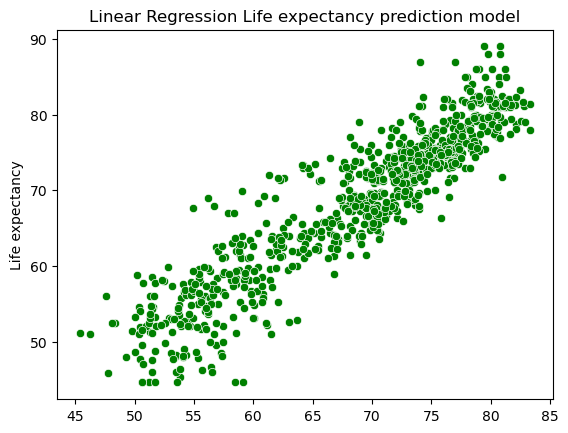

In [67]:
#plotting the data to check if its forming a good best fit line
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=y_predict, y=y_test, color='green') 
plt.title('Linear Regression Life expectancy prediction model')
plt.show()

As we can see, most predicted values align closely with the actual life expectancy values, forming a near-linear pattern. This indicates that the model has high accuracy and performs well on unseen data.